In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

from scipy import stats
from scipy.special import expit as logistic

In [2]:
#az.rcParams.keys() #CA

In [3]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.89
#az.rcParams["stats.credible_interval"] = 0.89 #CA
az.rcParams["stats.ic_scale"] = "deviance"
az.rcParams["stats.information_criterion"] = "waic"

#### Code 13.1

In [4]:
d = pd.read_csv("Data/reedfrogs.csv", sep=",")
print(d.shape)
d.head(8)

(48, 5)


,density,pred,size,surv,propsurv
0,10,no,big,9,0.9
1,10,no,big,10,1.0
2,10,no,big,7,0.7
3,10,no,big,10,1.0
4,10,no,small,9,0.9
5,10,no,small,9,0.9
6,10,no,small,10,1.0
7,10,no,small,9,0.9


#### Code 13.2

In [5]:
# make the tank cluster variable
tank = np.arange(d.shape[0])
n_tanks = d.shape[0]

# fit
with pm.Model() as m_13_1:
    a = pm.Normal("a", 0, 1.5, shape=n_tanks)
    p = pm.math.invlogit(a[tank])

    S = pm.Binomial("S", n=d.density, p=p, observed=d.surv)
    trace_13_1 = pm.sample(random_seed=RANDOM_SEED)

az.summary(trace_13_1, round_to=2)

C:\Users\User\anaconda3\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
C:\Users\User\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a[0],1.73,0.79,0.47,2.89,0.01,0.01,8842.23,2960.82,1.0
a[1],2.40,0.90,0.97,3.81,0.01,0.01,8797.30,2679.57,1.0
a[2],0.75,0.65,-0.31,1.77,0.01,0.01,9391.00,2225.96,1.0
a[3],2.40,0.93,1.04,4.00,0.01,0.01,8682.30,2799.45,1.0
a[4],1.74,0.76,0.47,2.87,0.01,0.01,8507.18,2881.32,1.0
a[5],1.72,0.77,0.40,2.83,0.01,0.01,8492.28,2744.86,1.0
a[6],2.38,0.86,1.04,3.72,0.01,0.01,10005.40,3018.19,1.0
a[7],1.73,0.78,0.44,2.89,0.01,0.01,9363.92,2533.93,1.0
a[8],-0.37,0.61,-1.35,0.59,0.01,0.01,7948.65,2571.18,1.0
a[9],1.70,0.76,0.50,2.86,0.01,0.01,9372.40,2720.84,1.0


#### Code 13.3

In [6]:
with pm.Model() as m_13_2:
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma = pm.Exponential("sigma", 1.0)

    a = pm.Normal("a", a_bar, sigma, shape=n_tanks)
    p = pm.math.invlogit(a[tank])

    S = pm.Binomial("S", n=d.density, p=p, observed=d.surv)
    trace_13_2 = pm.sample(random_seed=RANDOM_SEED)

C:\Users\User\anaconda3\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, sigma, a_bar]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 44 seconds.


#### Code 13.4

In [7]:
az.compare({"m13_1": trace_13_1, "m13_2": trace_13_2})

C:\Users\User\anaconda3\lib\site-packages\arviz\stats\stats.py:146: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\arviz\stats\stats.py:1406: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the m

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
m13_2,0,201.270861,21.497546,0.000000,1.0,7.259438,0.000000,True,deviance
m13_1,1,214.435248,25.475522,13.164387,0.0,4.574587,3.662744,True,deviance


#### Code 13.5

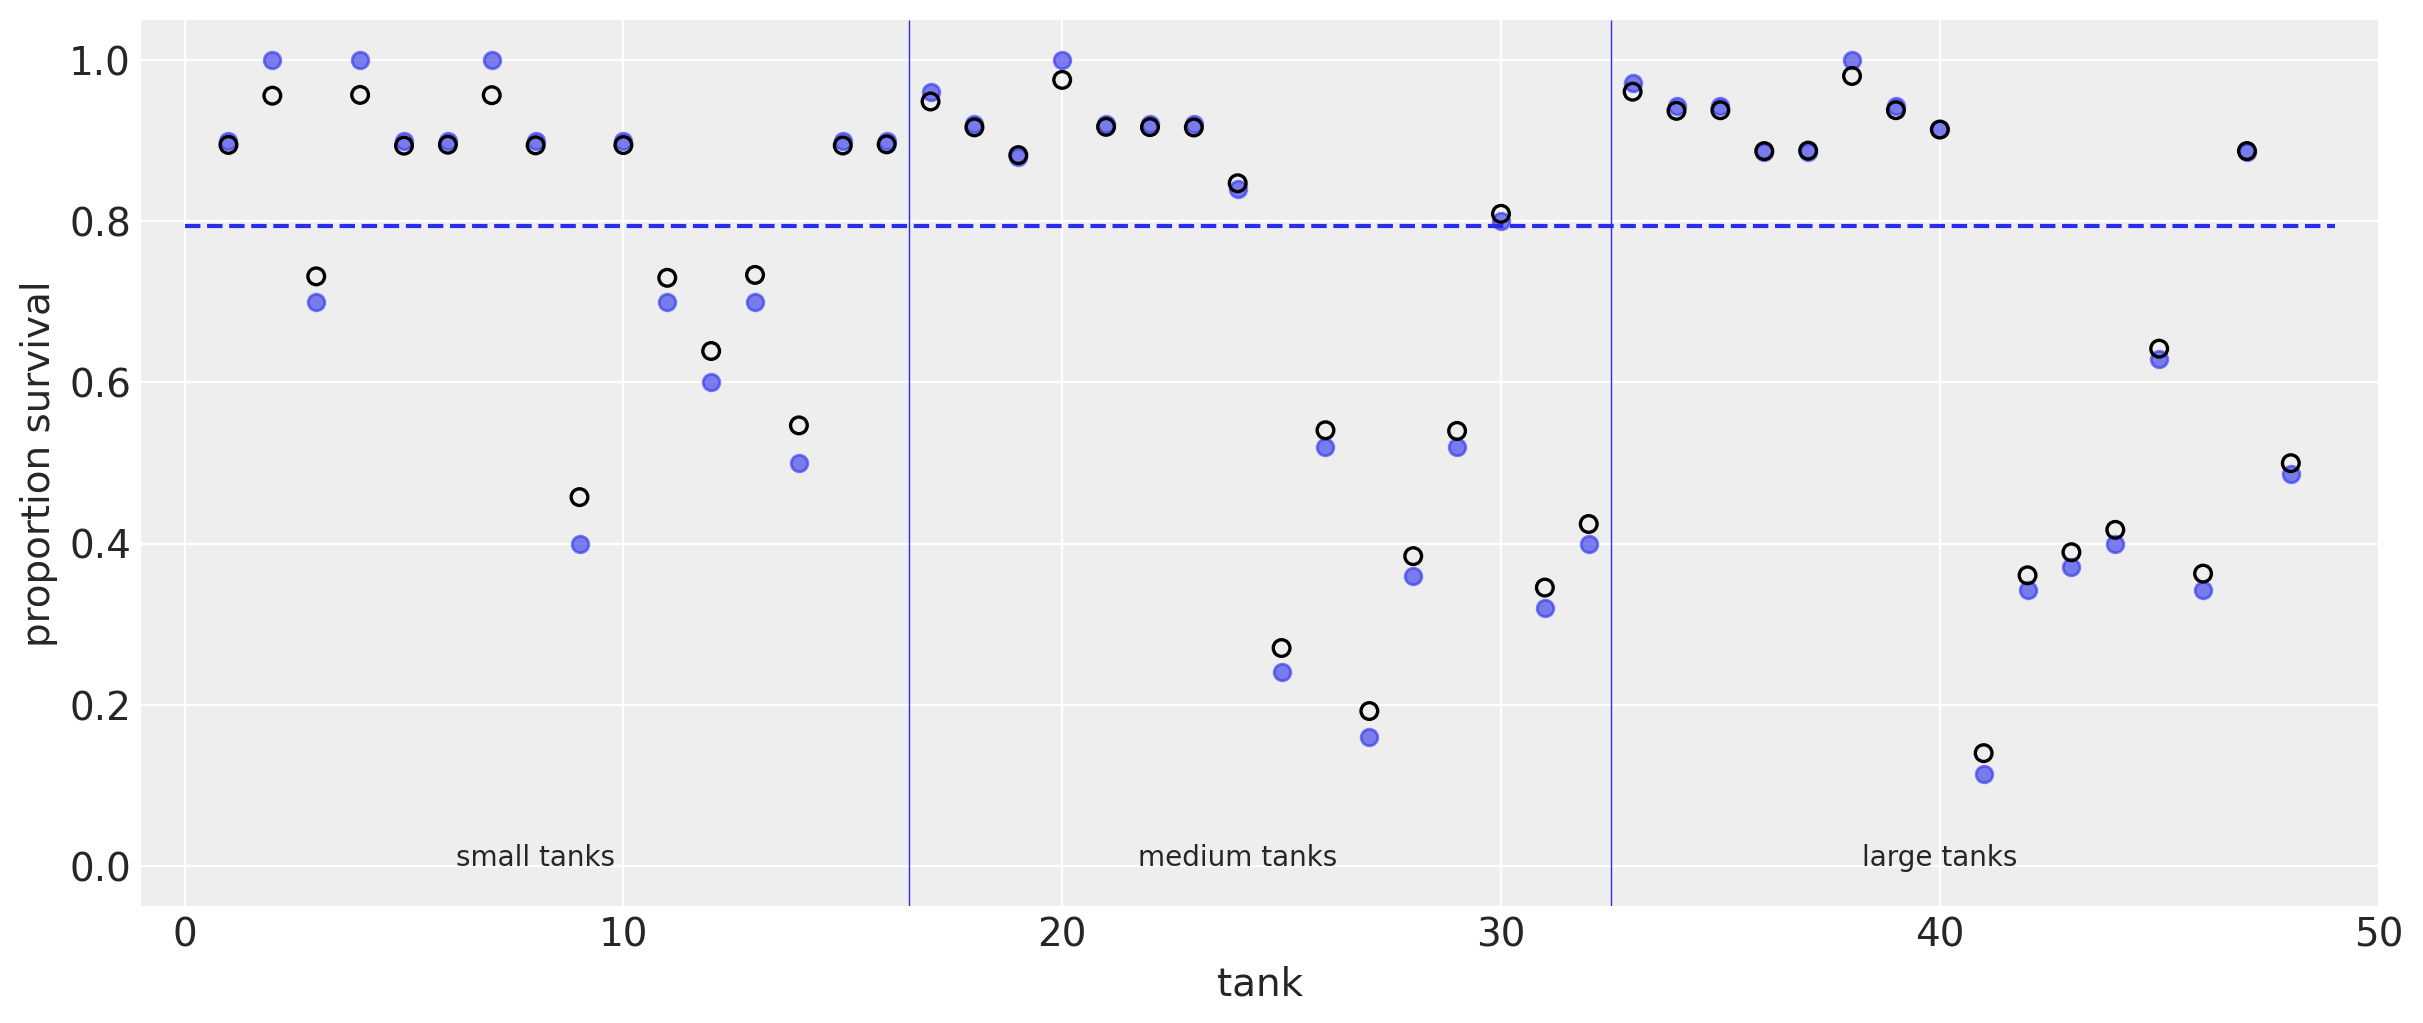

In [8]:
# compute mean intercept for each tank
# also transform to probability with logistic
propsurv_est = logistic(trace_13_2["a"].mean(0))

_, ax = plt.subplots(1, 1, figsize=(12, 5))

# display raw proportions surviving in each tank
ax.scatter(np.arange(1, 49), d.propsurv, alpha=0.6)

# overlay posterior means
ax.scatter(np.arange(1, 49), propsurv_est, facecolors="none", edgecolors="k", lw=1.2)

# mark posterior mean probability across tanks
ax.hlines(logistic(trace_13_2["a_bar"].mean()), 0, 49, linestyles="--")

# draw vertical dividers between tank densities
ax.vlines([16.5, 32.5], -0.05, 1.05, lw=0.5)
ax.text(8, 0, "small tanks", horizontalalignment="center")
ax.text(16 + 8, 0, "medium tanks", horizontalalignment="center")
ax.text(32 + 8, 0, "large tanks", horizontalalignment="center")

ax.set_xlabel("tank", fontsize=14)
ax.set_ylabel("proportion survival", fontsize=14)
ax.set_xlim(-1, 50)
ax.set_ylim(-0.05, 1.05);

#### Code 13.6

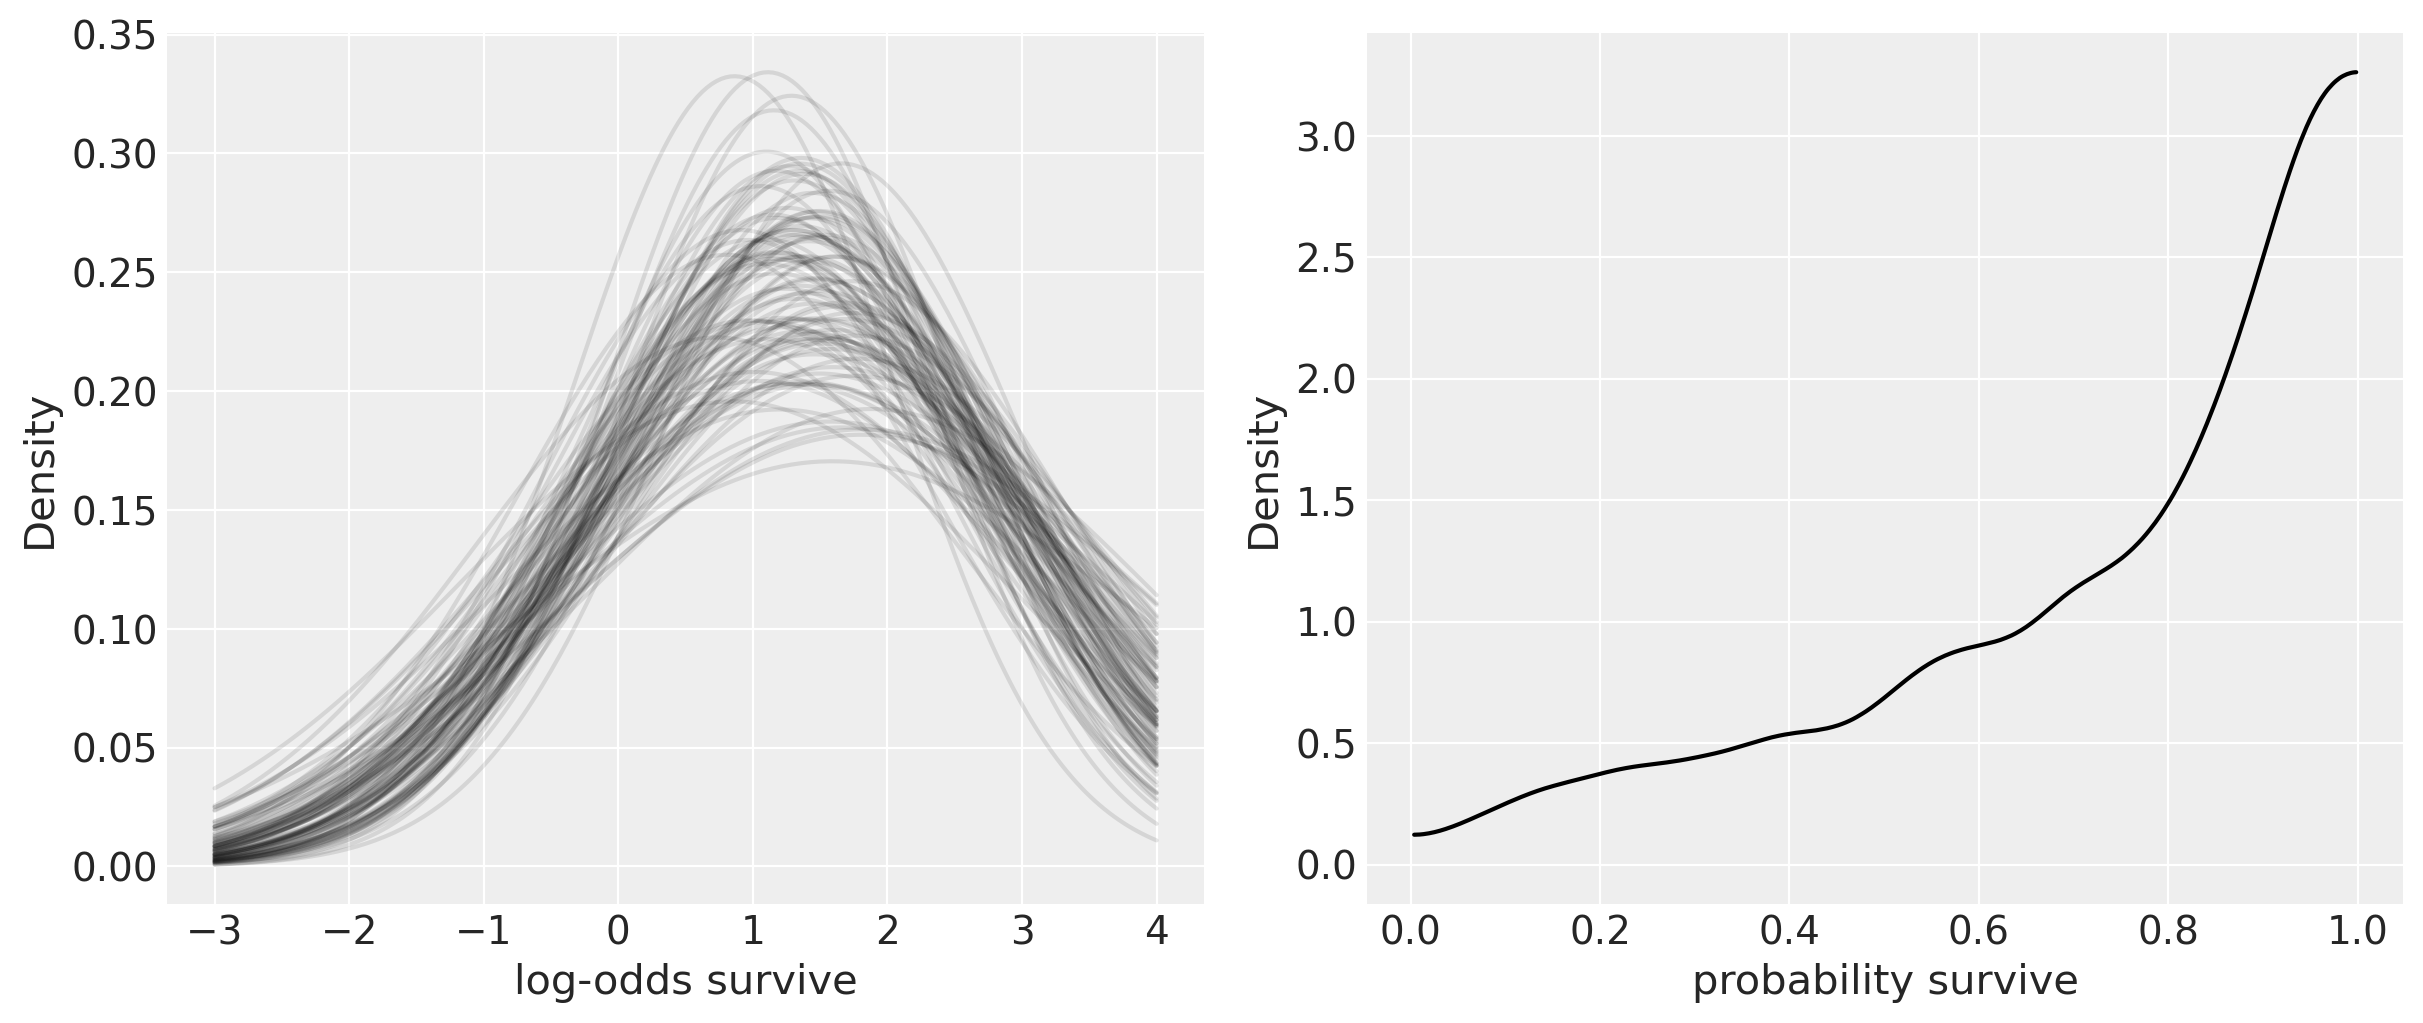

In [9]:
_, ax = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# show first 100 populations in the posterior
xrange = np.linspace(-3, 4, 200)
postcurve = [
    stats.norm.pdf(xrange, loc=trace_13_2["a_bar"][i], scale=trace_13_2["sigma"][i])
    for i in range(100)
]
ax[0].plot(xrange, np.asarray(postcurve).T, alpha=0.1, color="k")
ax[0].set_xlabel("log-odds survive")
ax[0].set_ylabel("Density")

# sample 8000 imaginary tanks from the posterior distribution
sim_tanks = np.random.normal(loc=trace_13_2["a_bar"], scale=trace_13_2["sigma"])

# transform to probability and visualize
az.plot_kde(logistic(sim_tanks), ax=ax[1], plot_kwargs={"color": "k"})
ax[1].set_xlabel("probability survive")
ax[1].set_ylabel("Density");

#### Code 13.7

In [10]:
a_bar, sigma, nponds = 1.5, 1.5, 60
Ni = np.repeat([5, 10, 25, 35], 15)

#### Code 13.8

In [11]:
a_pond = np.random.normal(loc=a_bar, scale=sigma, size=nponds)

#### Code 13.9

In [12]:
dsim = pd.DataFrame(dict(pond=np.arange(nponds), Ni=Ni, true_a=a_pond))
dsim.head()

,pond,Ni,true_a
0,0,5,3.195438
1,1,5,1.637124
2,2,5,1.232507
3,3,5,0.765020
4,4,5,1.300738


#### Code 13.10
Data types related. Python is dynamically-typed.

#### Code 13.11

In [13]:
dsim["Si"] = np.random.binomial(dsim["Ni"], logistic(dsim["true_a"]))

#### Code 13.12

In [14]:
dsim["p_nopool"] = dsim.Si / dsim.Ni

#### Code 13.13

In [15]:
with pm.Model() as m_13_3:
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma = pm.Exponential("sigma", 1.0)

    a_pond = pm.Normal("a_pond", a_bar, sigma, shape=nponds)
    p = pm.math.invlogit(a_pond[dsim.pond.values])

    Si = pm.Binomial("Si", n=dsim.Ni.values, p=p, observed=dsim.Si)
    trace_13_3 = pm.sample(random_seed=RANDOM_SEED)

C:\Users\User\anaconda3\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_pond, sigma, a_bar]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 48 seconds.


#### Code 13.14

In [16]:
az.summary(trace_13_3, var_names=["a_bar", "sigma"], round_to=2)

C:\Users\User\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_bar,1.31,0.24,0.93,1.69,0.0,0.0,4365.81,2730.19,1.0
sigma,1.60,0.22,1.26,1.95,0.0,0.0,1943.33,2633.14,1.0


#### Code 13.15

In [17]:
dsim["p_partpool"] = logistic(trace_13_3["a_pond"].mean(0))

#### Code 13.16

In [18]:
dsim["p_true"] = logistic(dsim["true_a"].values)

#### Code 13.17

In [19]:
nopool_error = np.abs(dsim.p_nopool - dsim.p_true)
partpool_error = np.abs(dsim.p_partpool - dsim.p_true)

#### Code 13.18 and 13.19

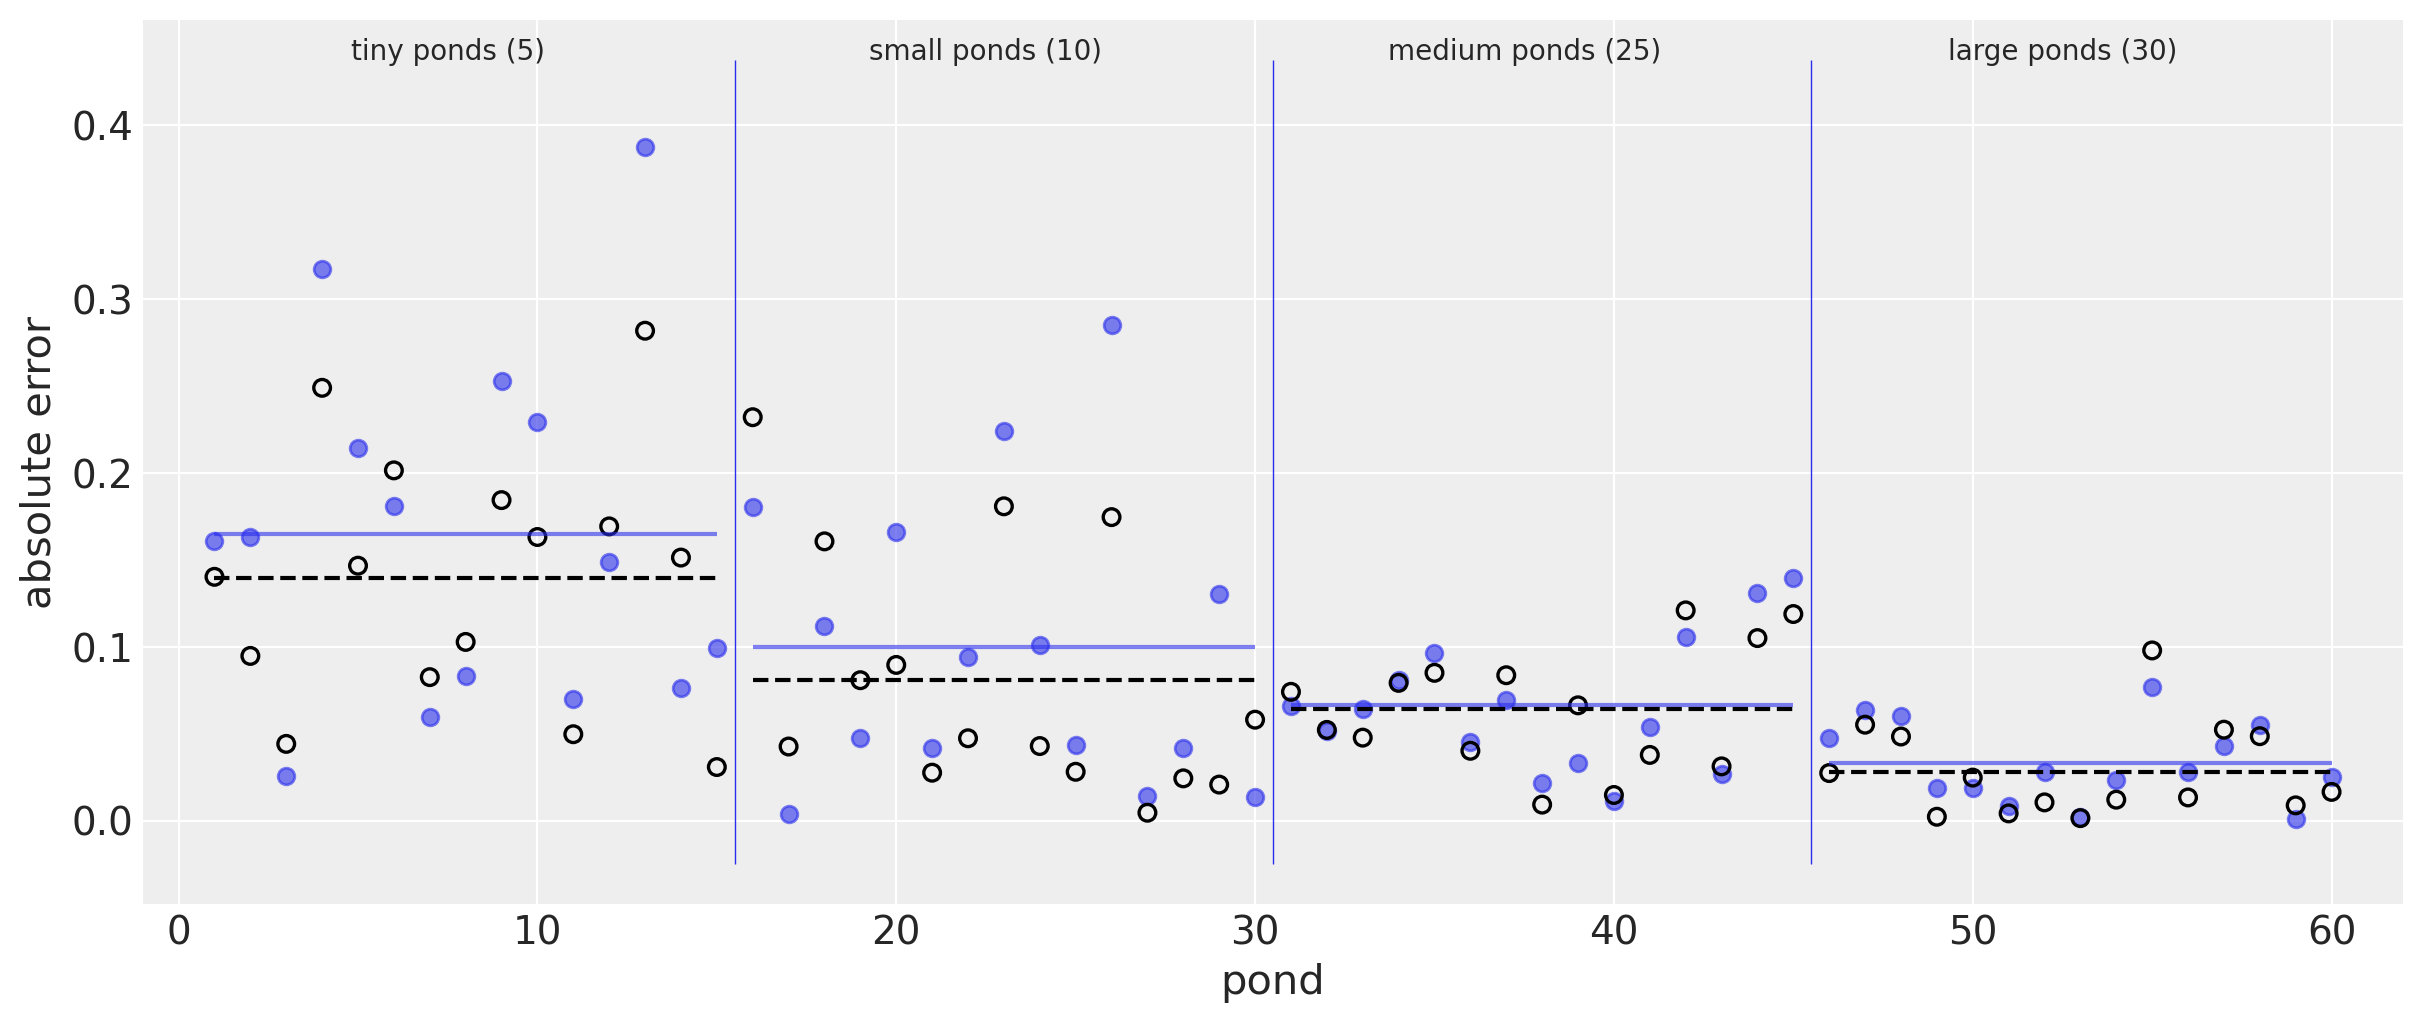

In [20]:
_, ax = plt.subplots(1, 1, figsize=(12, 5))
xrange = np.arange(60)
xrange_ = xrange.reshape((4, 15))

ax.scatter(xrange + 1, nopool_error, alpha=0.6)
ax.scatter(xrange + 1, partpool_error, facecolors="none", edgecolors="k", lw=1.2)
ax.vlines(xrange_[1:, 0] + 0.5, -0.025, max(nopool_error) + 0.05, lw=0.5)

textall = [
    "tiny ponds (5)",
    "small ponds (10)",
    "medium ponds (25)",
    "large ponds (30)",
]
for isem in range(4):
    ax.hlines(
        nopool_error[xrange_[isem, :]].mean(),
        xrange_[isem, 0] + 1,
        xrange_[isem, -1] + 1,
        color="C0",
        alpha=0.6,
    )
    ax.hlines(
        partpool_error[xrange_[isem, :]].mean(),
        xrange_[isem, 0] + 1,
        xrange_[isem, -1] + 1,
        color="k",
        linestyles="--",
    )
    ax.text(
        xrange_[isem, 7] + 0.5,
        max(nopool_error) + 0.05,
        textall[isem],
        horizontalalignment="center",
    )

ax.set_xlabel("pond")
ax.set_ylabel("absolute error")
ax.set_xlim(-1, 62);

#### Code 13.20

This part is Stan related. To do the same in PyMC3 (i.e., avoid compiling the same model twice), you need to set up the input data with `pm.Data`. There are examples in this repository, and you can also take a look at [this tutorial](https://docs.pymc.io/notebooks/data_container.html)

#### Code 13.21

In [21]:
d = pd.read_csv("Data/chimpanzees.csv", sep=";")

treatment = (d.prosoc_left + 2 * d.condition).values
Ntreatments = len(np.unique(treatment))

actor = (d.actor - 1).astype(int).values
Nactor = len(np.unique(actor))

block = (d.block - 1).astype(int).values
Nblock = len(np.unique(block))

with pm.Model() as m_13_4:
    # hyper-priors
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)
    sigma_g = pm.Exponential("sigma_g", 1.0)

    # adaptive priors
    a = pm.Normal("a", a_bar, sigma_a, shape=Nactor)
    g = pm.Normal("g", 0.0, sigma_g, shape=Nblock)

    b = pm.Normal("b", 0.0, 0.5, shape=Ntreatments)
    p = pm.math.invlogit(a[actor] + g[block] + b[treatment])
    pulled_left = pm.Binomial("pulled_left", 1, p, observed=d.pulled_left)

    trace_13_4 = pm.sample(tune=3000, target_accept=0.95, random_seed=RANDOM_SEED)
    idata_13_4 = az.from_pymc3(trace_13_4)

C:\Users\User\anaconda3\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, g, a, sigma_g, sigma_a, a_bar]


Sampling 4 chains for 3_000 tune and 1_000 draw iterations (12_000 + 4_000 draws total) took 111 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


#### Code 13.22

In [22]:
az.summary(idata_13_4, round_to=2)

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_bar,0.59,0.74,-0.55,1.76,0.02,0.01,1689.89,1552.94,1.00
a[0],-0.36,0.35,-0.93,0.18,0.01,0.01,1028.80,1679.03,1.00
a[1],4.69,1.27,2.92,6.60,0.04,0.03,1557.95,1137.38,1.00
a[2],-0.67,0.36,-1.23,-0.09,0.01,0.01,1153.98,1673.34,1.00
a[3],-0.66,0.36,-1.24,-0.09,0.01,0.01,1126.94,2073.15,1.01
a[4],-0.37,0.36,-0.96,0.18,0.01,0.01,1134.42,1730.07,1.00
a[5],0.58,0.36,-0.05,1.08,0.01,0.01,959.92,1245.21,1.01
a[6],2.10,0.45,1.34,2.75,0.01,0.01,1488.34,2181.57,1.00
g[0],-0.15,0.21,-0.49,0.13,0.01,0.01,983.27,1318.91,1.00
g[1],0.03,0.17,-0.20,0.31,0.00,0.00,1984.58,1284.29,1.00


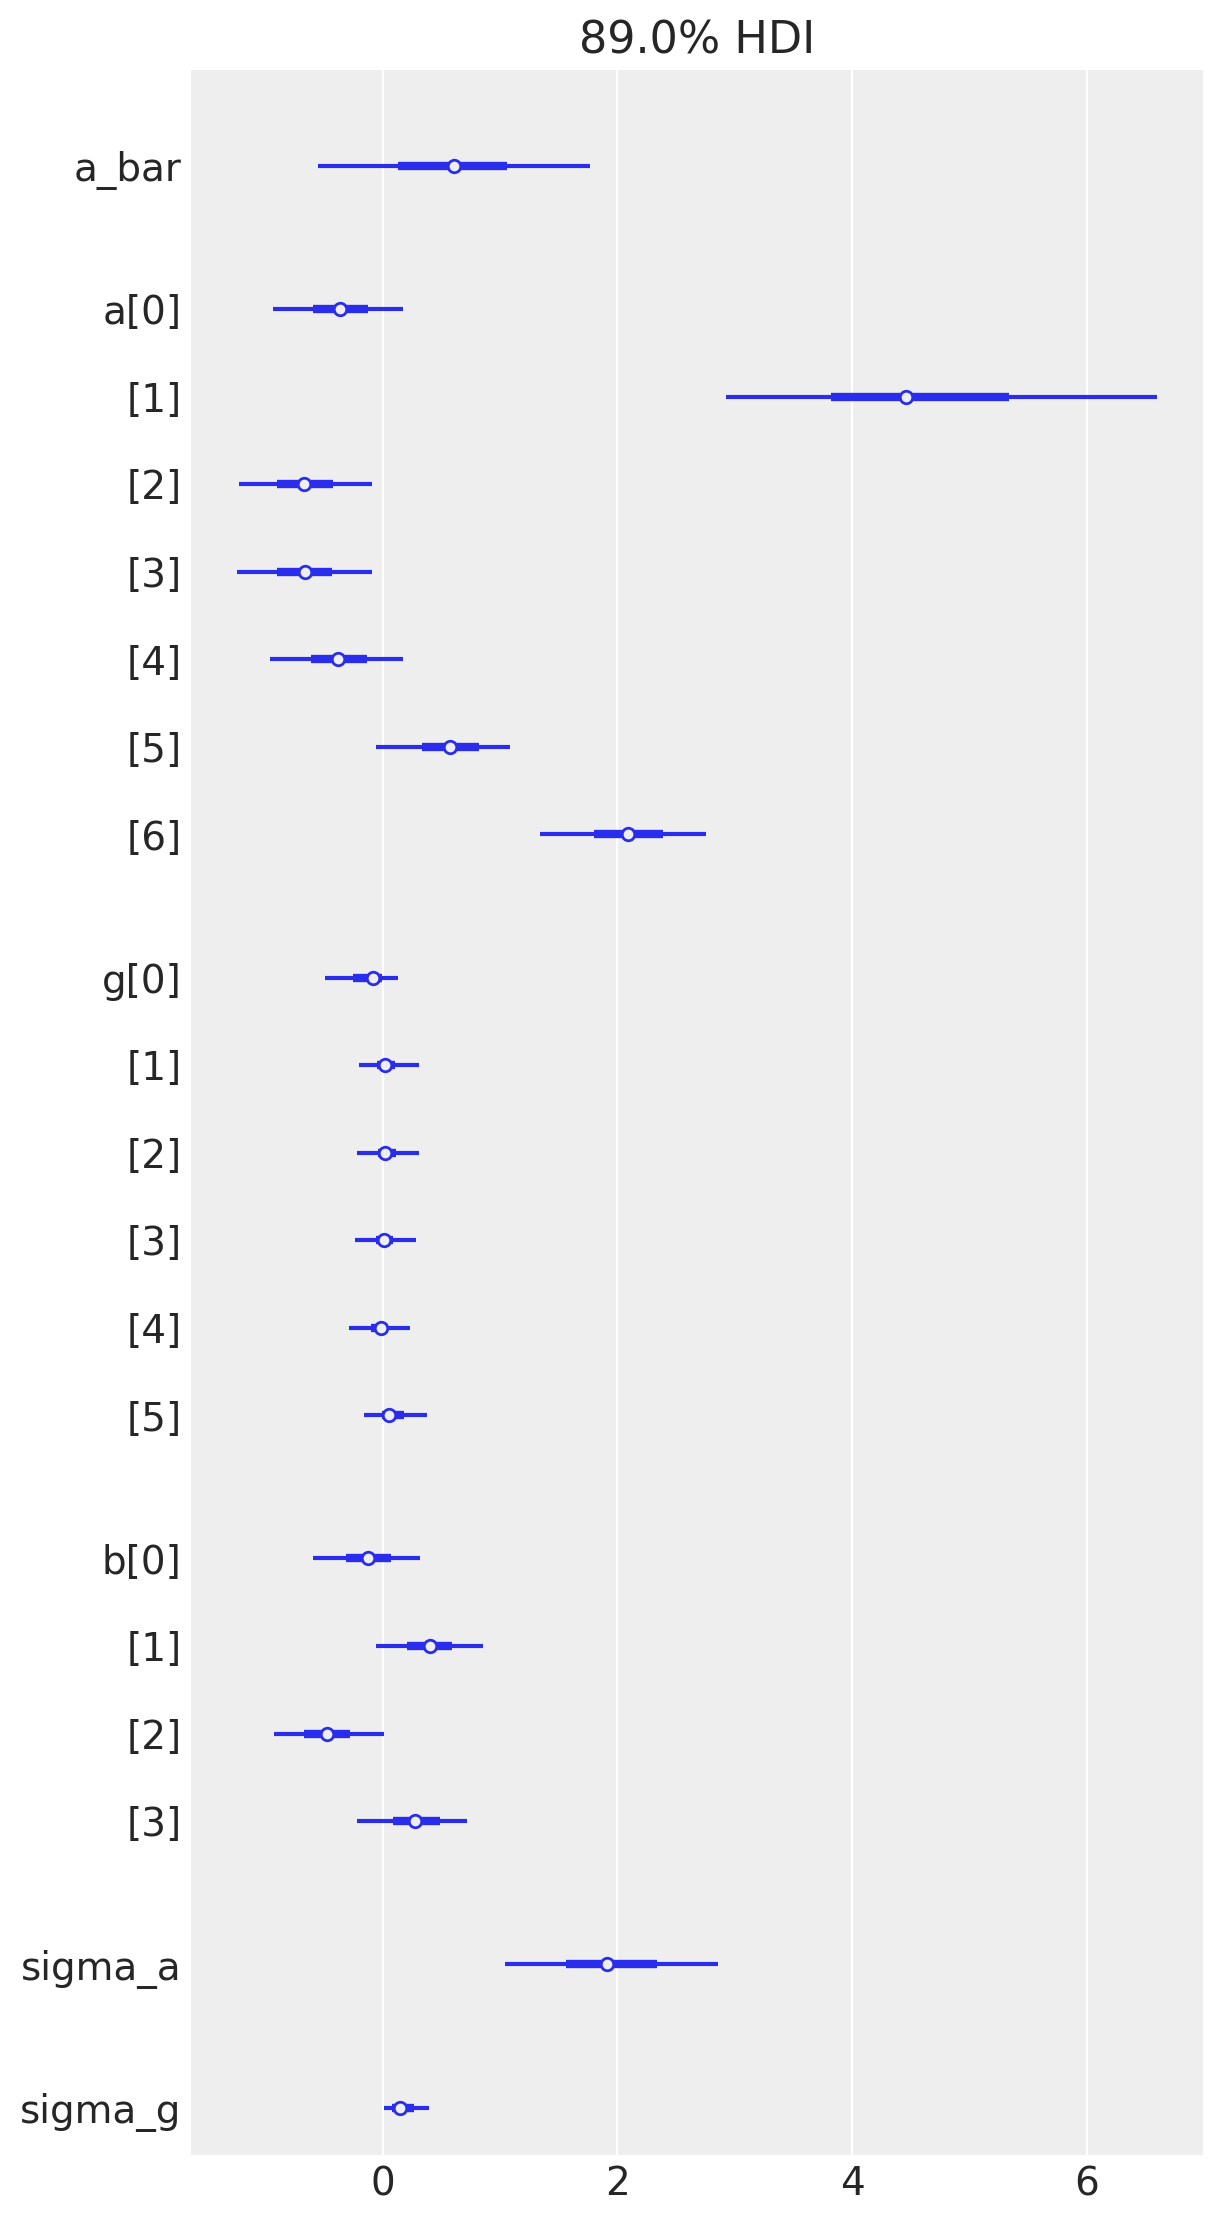

In [23]:
az.plot_forest(idata_13_4, combined=True);

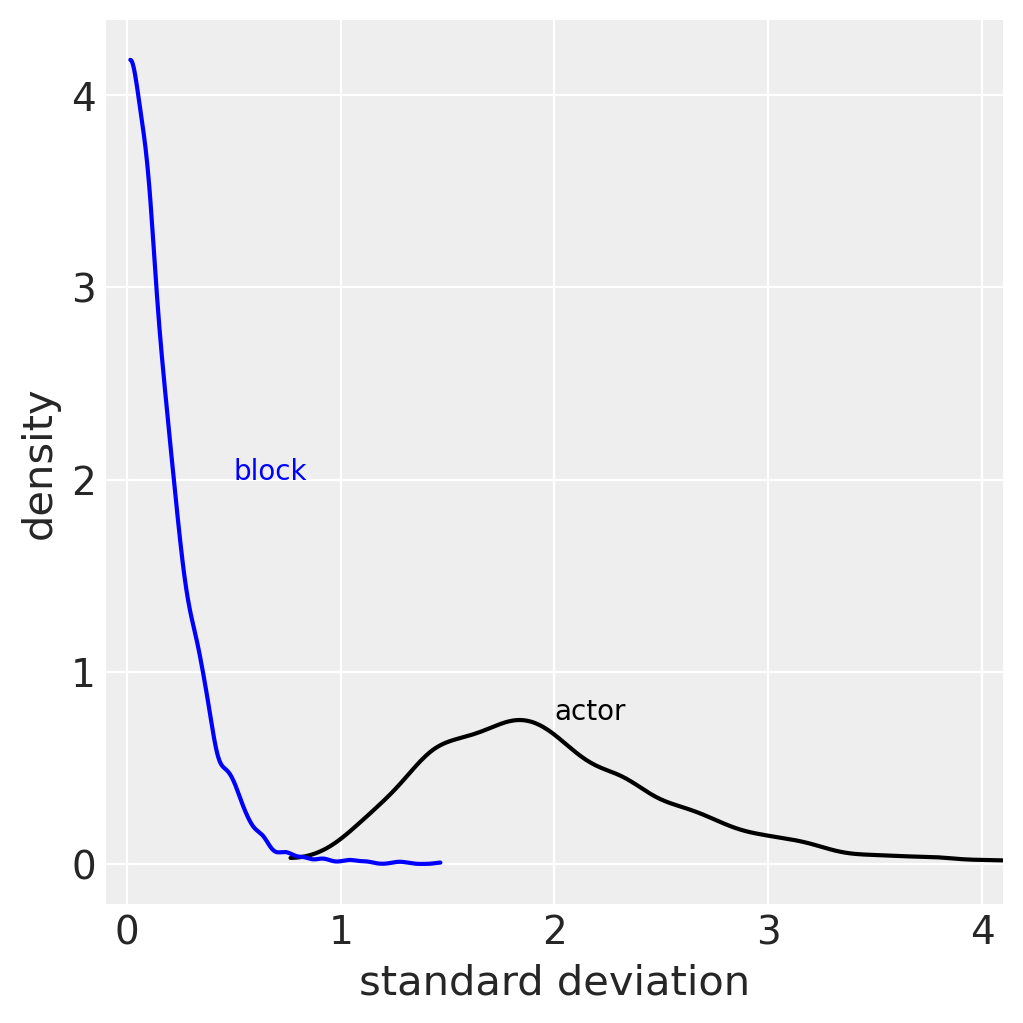

In [24]:
_, ax = plt.subplots(1, 1, figsize=(5, 5))

az.plot_kde(idata_13_4.posterior["sigma_a"], ax=ax, plot_kwargs={"color": "black"})
az.plot_kde(idata_13_4.posterior["sigma_g"], ax=ax, plot_kwargs={"color": "blue"})

ax.text(2, 0.75, "actor", color="black")
ax.text(0.5, 2, "block", color="blue")
ax.set_xlabel("standard deviation")
ax.set_ylabel("density")
ax.set_xlim(-0.1, 4.1);

#### Code 13.23

In [25]:
with pm.Model() as m_13_5:
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)

    a = pm.Normal("a", a_bar, sigma_a, shape=Nactor)
    b = pm.Normal("b", 0.0, 0.5, shape=Ntreatments)

    p = pm.math.invlogit(a[actor] + b[treatment])
    pulled_left = pm.Binomial("pulled_left", 1, p, observed=d.pulled_left)

    trace_13_5 = pm.sample(random_seed=RANDOM_SEED)
    idata_13_5 = az.from_pymc3(trace_13_5)

C:\Users\User\anaconda3\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a, sigma_a, a_bar]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 58 seconds.


#### Code 13.24

In [26]:
az.compare({"m_13_4": idata_13_4, "m_13_5": idata_13_5})

C:\Users\User\anaconda3\lib\site-packages\arviz\stats\stats.py:146: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
m_13_5,0,531.029903,8.423449,0.000000,1.0,19.174561,0.000000,False,deviance
m_13_4,1,531.960398,10.404406,0.930496,0.0,19.323031,1.514821,False,deviance


#### Code 13.25

In [27]:
with pm.Model() as m_13_6:
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)
    sigma_g = pm.Exponential("sigma_g", 1.0)
    sigma_b = pm.Exponential("sigma_b", 1.0)

    a = pm.Normal("a", a_bar, sigma_a, shape=Nactor)
    g = pm.Normal("g", 0.0, sigma_g, shape=Nblock)
    b = pm.Normal("b", 0.0, sigma_b, shape=Ntreatments)

    p = pm.math.invlogit(a[actor] + g[block] + b[treatment])
    pulled_left = pm.Binomial("pulled_left", 1, p, observed=d.pulled_left)

    trace_13_6 = pm.sample(tune=2000, target_accept=0.95, random_seed=RANDOM_SEED)
    idata_13_6 = az.from_pymc3(trace_13_6)

C:\Users\User\anaconda3\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, g, a, sigma_b, sigma_g, sigma_a, a_bar]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 106 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8821658690166404, but should be close to 0.95. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


In [28]:
m13_4 = az.summary(idata_13_4, var_names=["b"], kind="stats", round_to=2)["mean"]
m13_4.name = "m13_4"
m13_6 = az.summary(idata_13_6, var_names=["b"], kind="stats", round_to=2)["mean"]
m13_6.name = "m13_6"
pd.concat([m13_4, m13_6], axis=1)

,m13_4,m13_6
b[0],-0.13,-0.11
b[1],0.40,0.39
b[2],-0.48,-0.43
b[3],0.28,0.28


#### Code 13.26

In [29]:
with pm.Model() as m_13_7:
    v = pm.Normal("v", 0.0, 3.0)
    x = pm.Normal("x", 0.0, pm.math.exp(v))

    trace_13_7 = pm.sample(random_seed=RANDOM_SEED)
    idata_13_7 = az.from_pymc3(trace_13_7)
az.summary(idata_13_7, round_to=2)

C:\Users\User\anaconda3\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, v]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
There were 500 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.27316724822561667, but should be close to 0.8. Try to increase the number of tuning steps.
There were 74 divergences after tuning. Increase `target_accept` or reparameterize.
There were 670 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.25553847855927436, but should be close to 0.8. Try to increase the number of tuning steps.
There were 266 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5959885383926555, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective sample

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
v,2.76,1.68,0.48,6.08,0.49,0.36,10.98,23.82,1.31
x,5.63,253.93,-122.03,107.58,18.40,13.03,226.17,90.28,1.22


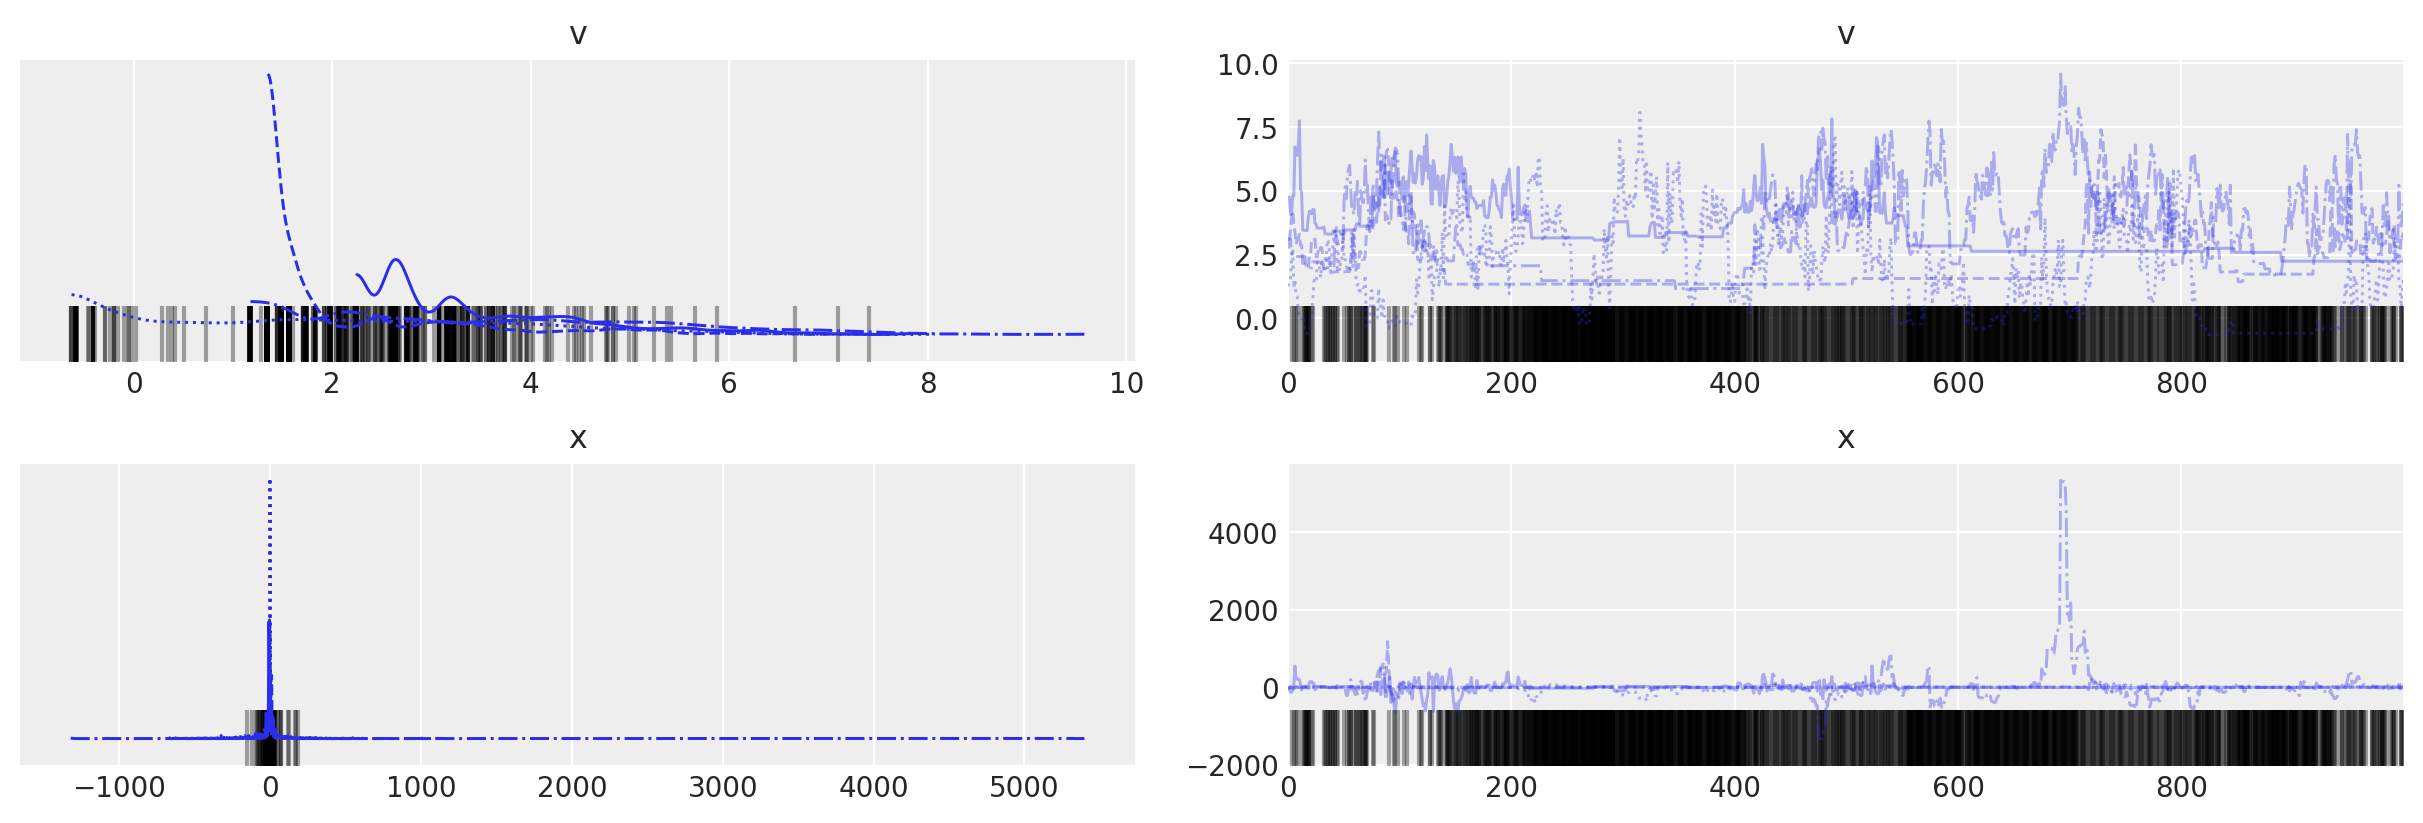

In [30]:
az.plot_trace(idata_13_7);

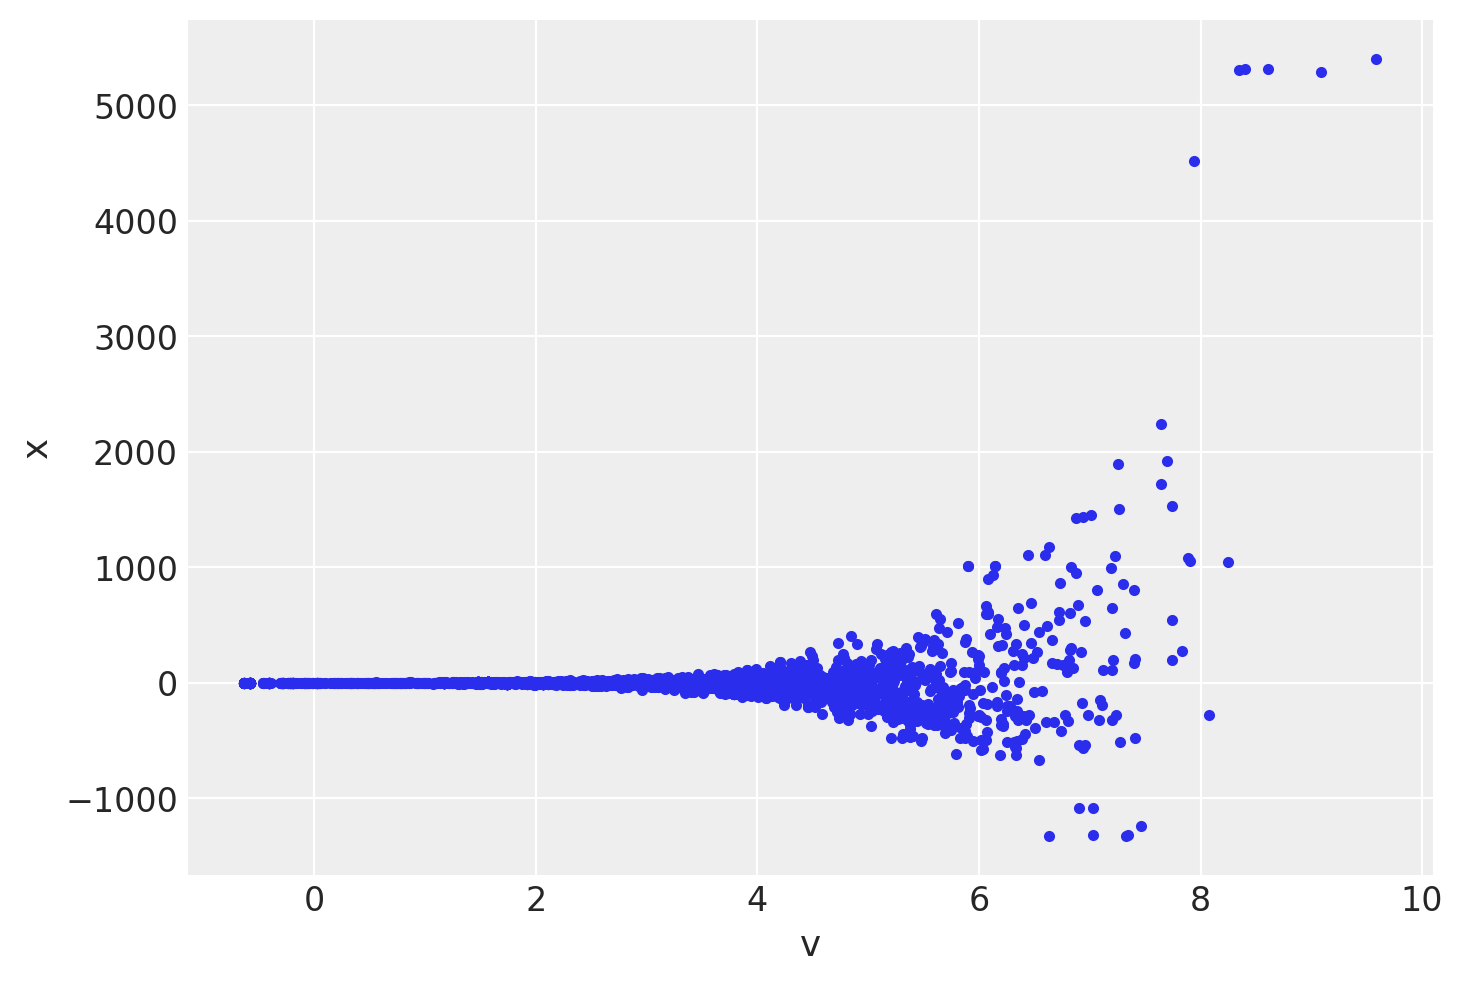

In [31]:
az.plot_pair(idata_13_7, textsize=12);

#### Code 13.27

In [32]:
with pm.Model() as m_13_7nc:
    v = pm.Normal("v", 0.0, 3.0)
    z = pm.Normal("z", 0.0, 1.0)
    x = pm.Deterministic("x", z * pm.math.exp(v))

    trace_13_7nc = pm.sample(random_seed=RANDOM_SEED)
    idata_13_7nc = az.from_pymc3(trace_13_7nc)
az.summary(idata_13_7nc, round_to=2)

C:\Users\User\anaconda3\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, v]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
v,0.04,2.91,-4.50,4.71,0.05,0.05,3520.77,2816.31,1.0
z,-0.01,1.00,-1.58,1.60,0.02,0.02,3561.29,2759.12,1.0
x,-8.35,2814.79,-22.99,24.48,34.78,34.20,2899.92,2969.82,1.0


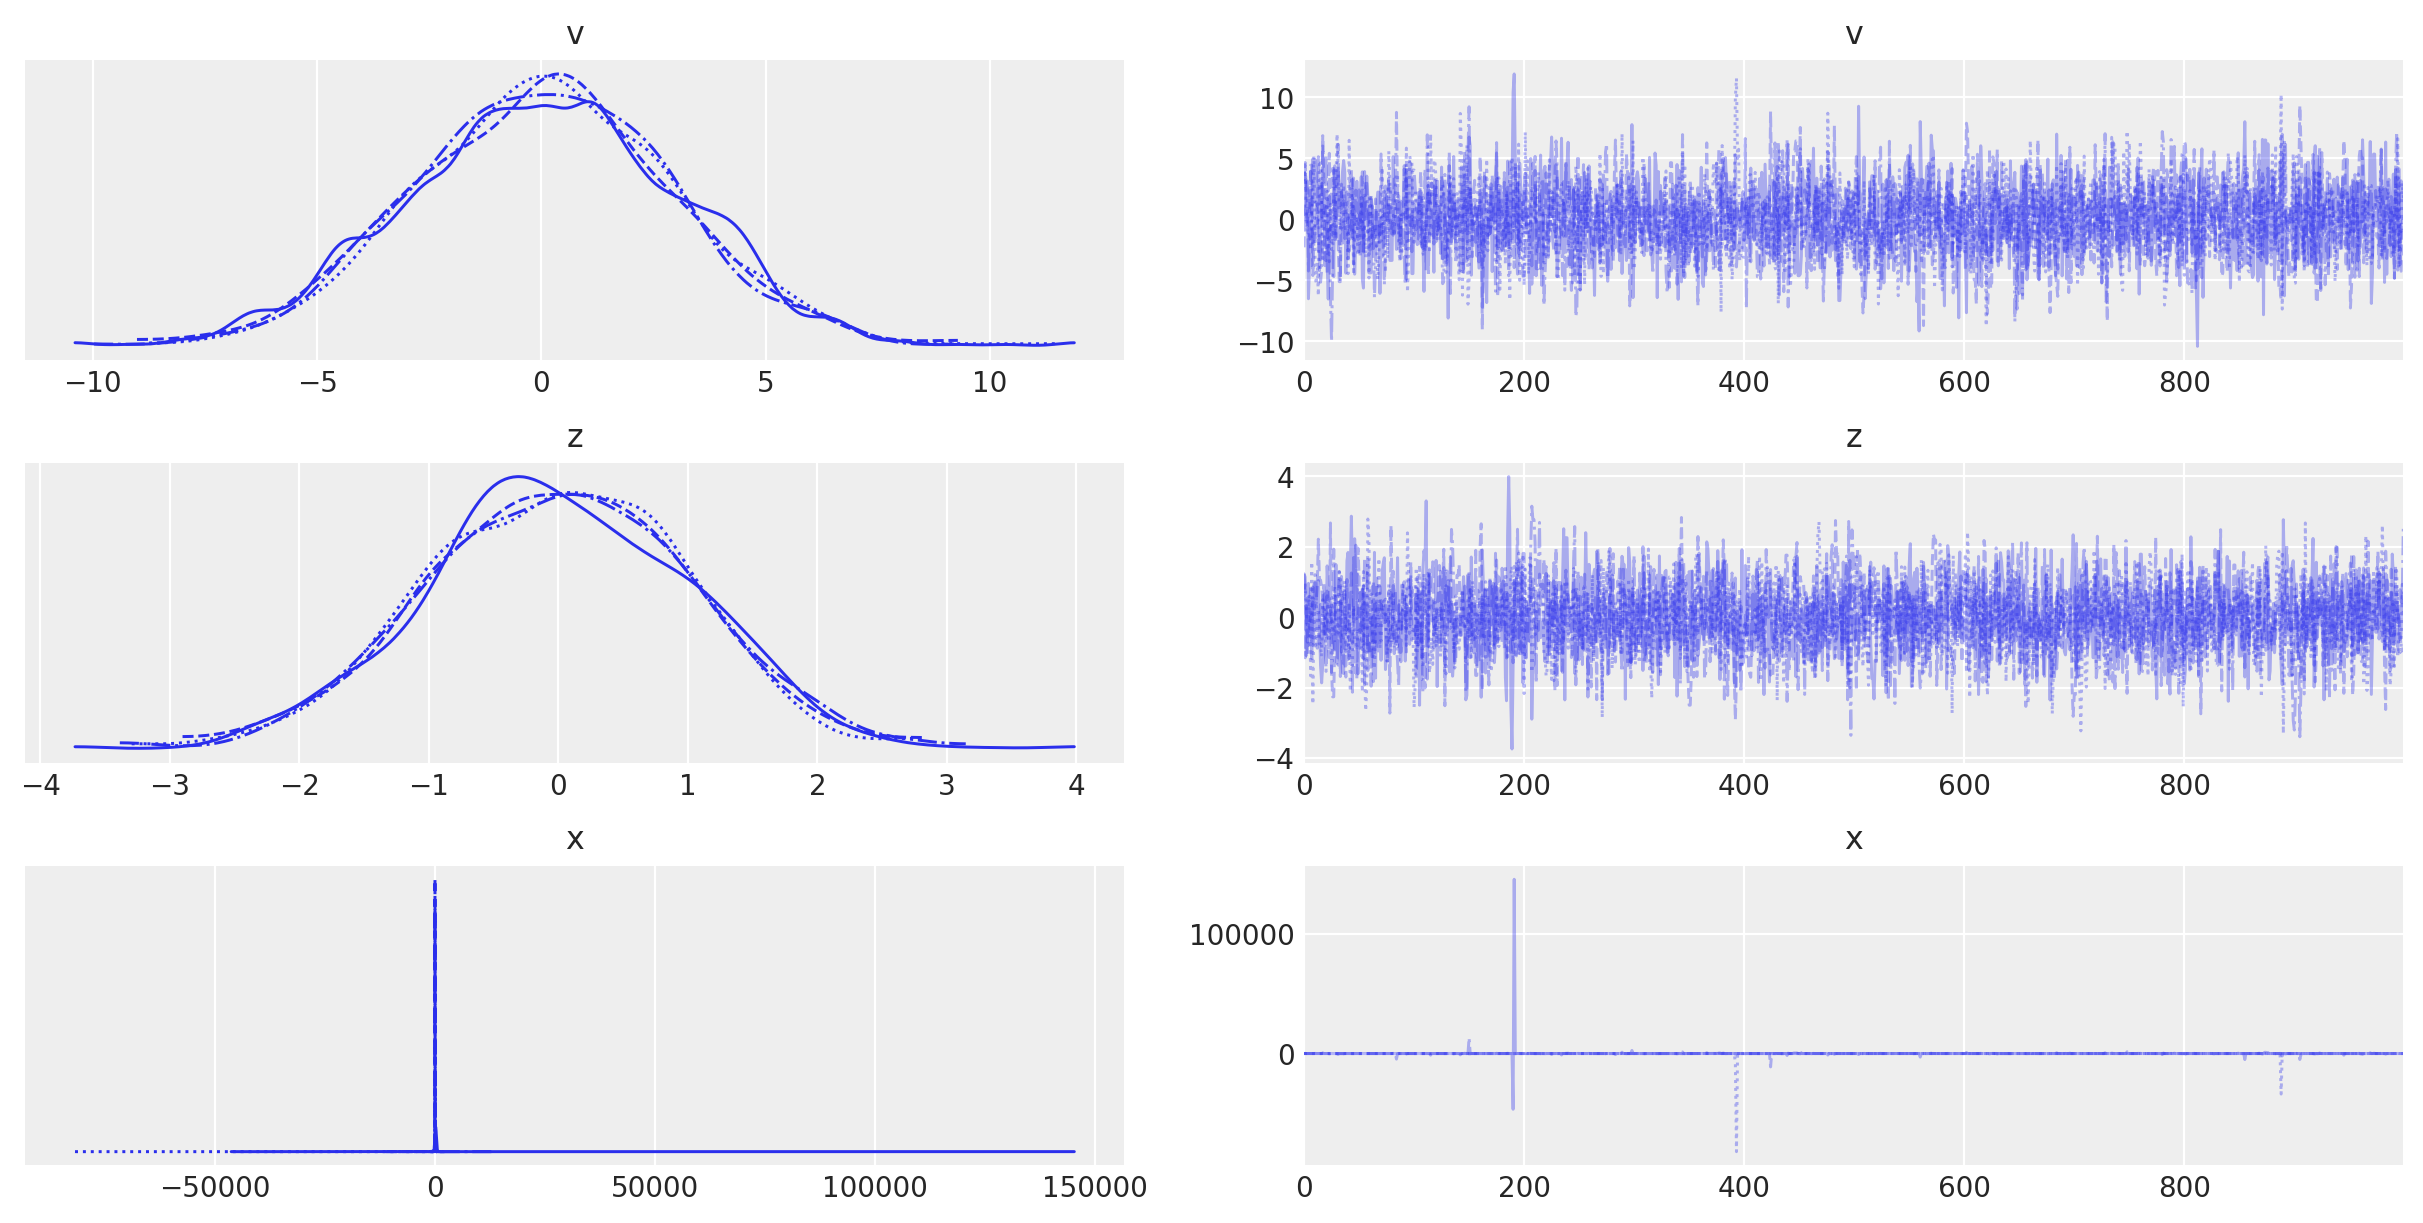

In [33]:
az.plot_trace(idata_13_7nc);

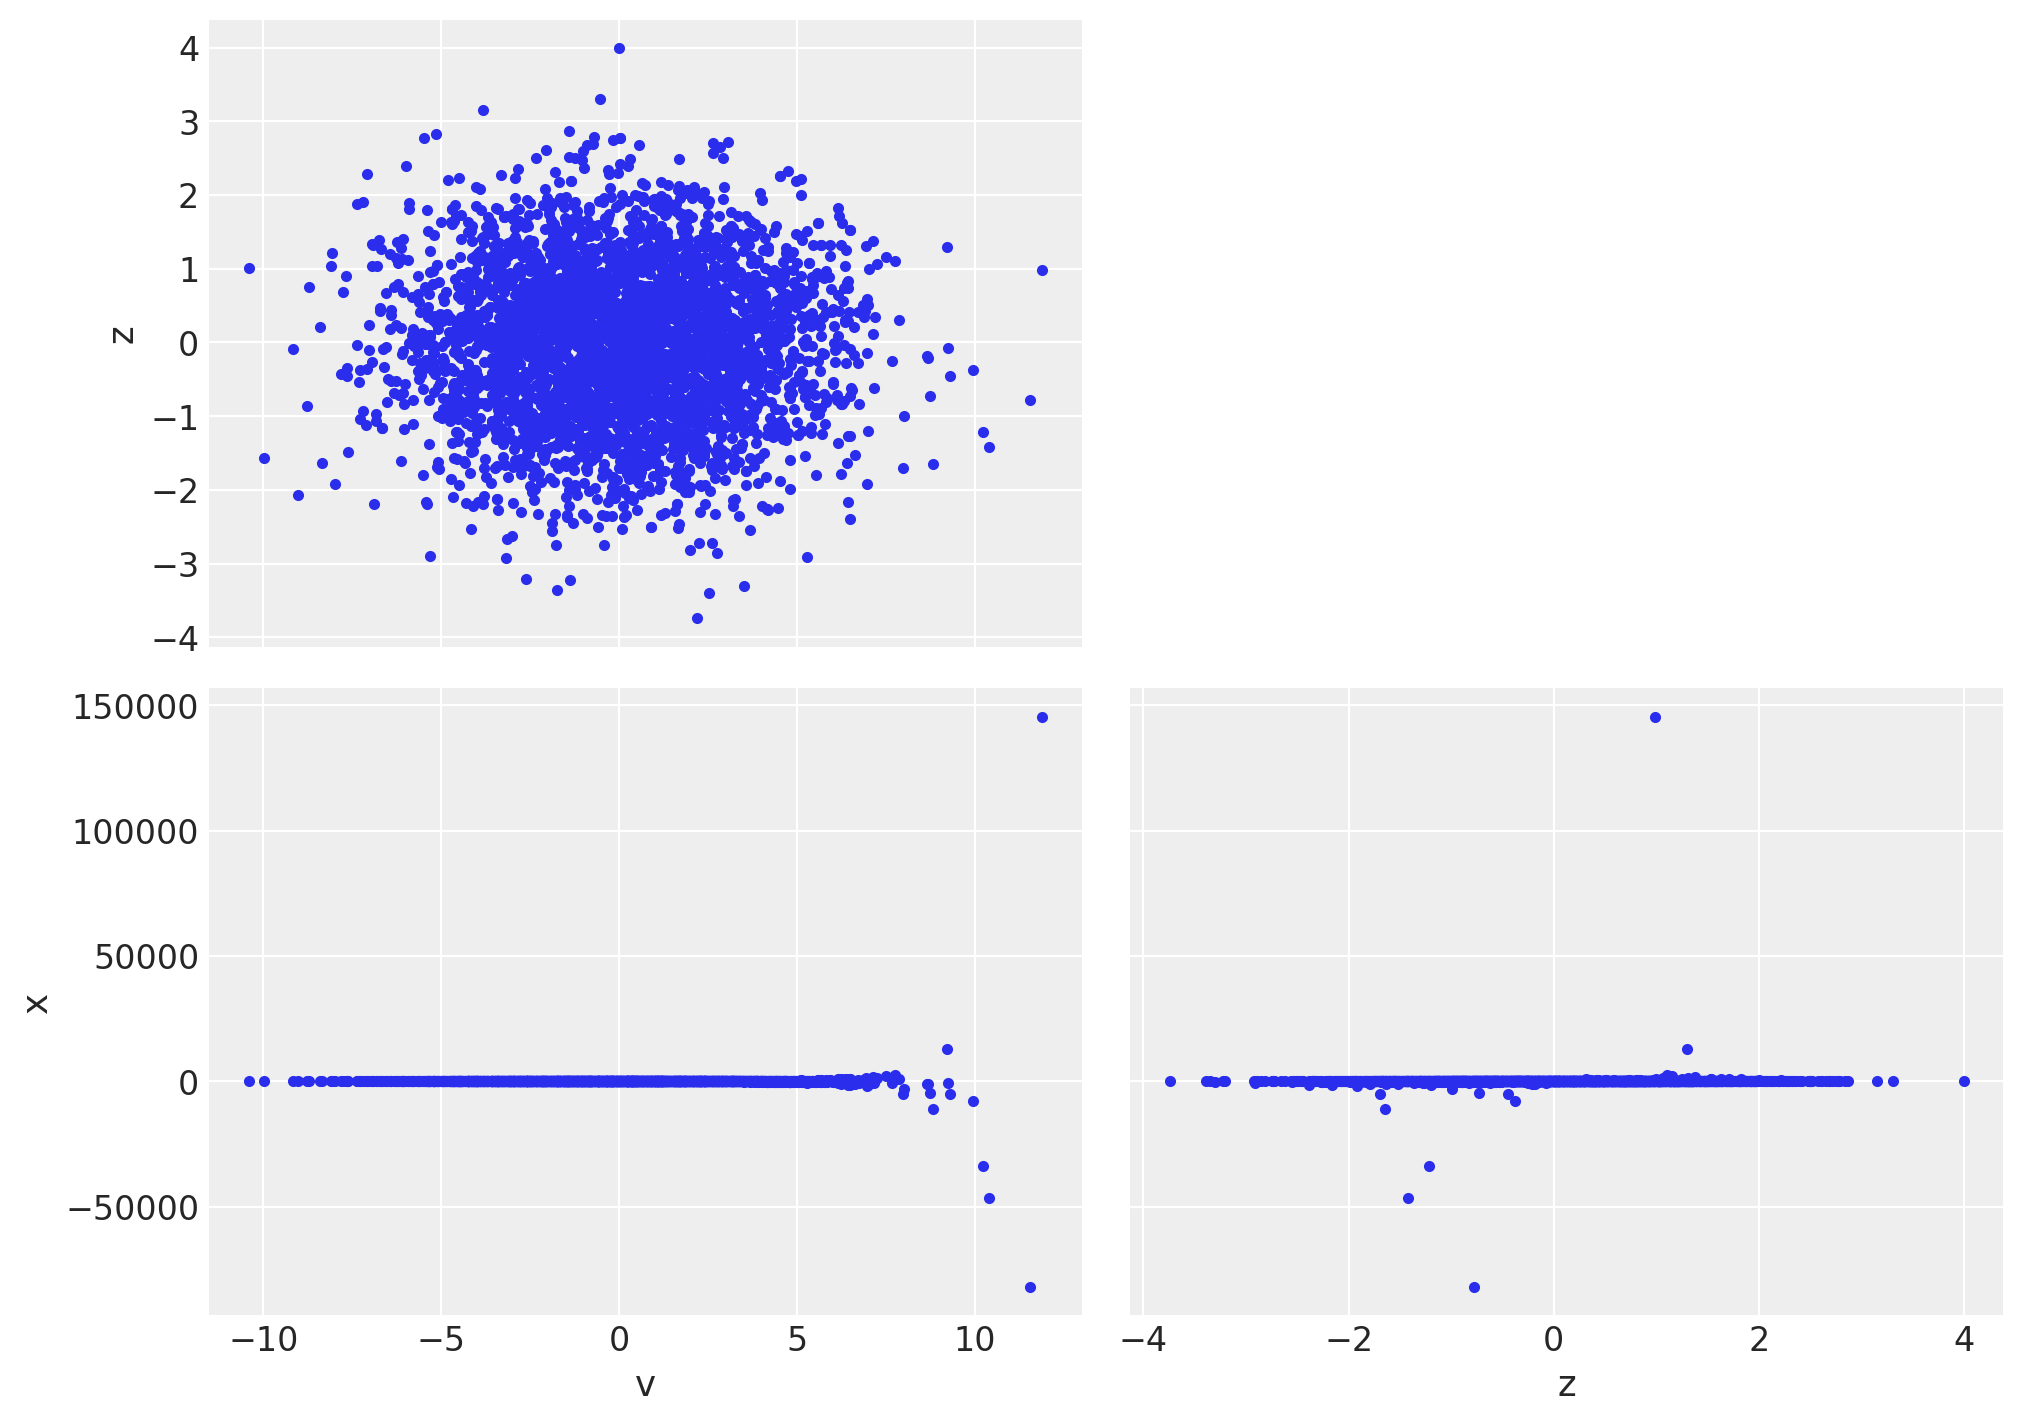

In [34]:
az.plot_pair(idata_13_7nc, textsize=12, figsize=(10, 7));

#### Code 13.28

In [35]:
with m_13_4:
    trace_13_4 = pm.sample(tune=3000, target_accept=0.99, random_seed=RANDOM_SEED)
    idata_13_4 = az.from_pymc3(trace_13_4)
az.summary(idata_13_4, round_to=2)

C:\Users\User\anaconda3\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, g, a, sigma_g, sigma_a, a_bar]


Sampling 4 chains for 3_000 tune and 1_000 draw iterations (12_000 + 4_000 draws total) took 286 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_bar,0.58,0.74,-0.57,1.77,0.02,0.01,2013.27,2229.87,1.0
a[0],-0.37,0.37,-0.93,0.25,0.01,0.01,961.58,1976.98,1.0
a[1],4.66,1.31,2.81,6.48,0.04,0.03,1490.23,1252.76,1.0
a[2],-0.66,0.37,-1.24,-0.10,0.01,0.01,945.05,1795.02,1.0
a[3],-0.67,0.37,-1.27,-0.11,0.01,0.01,911.91,1452.83,1.0
a[4],-0.36,0.36,-0.93,0.22,0.01,0.01,910.76,1572.85,1.0
a[5],0.57,0.36,-0.01,1.14,0.01,0.01,853.30,1993.05,1.0
a[6],2.10,0.46,1.38,2.82,0.01,0.01,1098.47,2114.64,1.0
g[0],-0.17,0.22,-0.54,0.11,0.01,0.01,1049.33,1400.07,1.0
g[1],0.04,0.18,-0.21,0.35,0.00,0.00,1888.69,1254.84,1.0


#### Code 13.29

In [36]:
with pm.Model() as m_13_4nc:
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)
    sigma_g = pm.Exponential("sigma_g", 1.0)

    z = pm.Normal("z", 0.0, 1.0, shape=Nactor)
    x = pm.Normal("x", 0.0, 1.0, shape=Nblock)
    b = pm.Normal("b", 0.0, 0.5, shape=Ntreatments)

    _ = pm.Deterministic("a", a_bar + z * sigma_a)  # actor intercepts
    _ = pm.Deterministic("g", x * sigma_g)  # block intercepts
    p = pm.math.invlogit(a_bar + z[actor] * sigma_a + x[block] * sigma_g + b[treatment])
    pulled_left = pm.Binomial("pulled_left", 1, p, observed=d.pulled_left)

    trace_13_4nc = pm.sample(tune=3000, target_accept=0.9, random_seed=RANDOM_SEED)
    idata_13_4nc = az.from_pymc3(trace_13_4nc)

C:\Users\User\anaconda3\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, x, z, sigma_g, sigma_a, a_bar]


Sampling 4 chains for 3_000 tune and 1_000 draw iterations (12_000 + 4_000 draws total) took 186 seconds.


#### Code 13.30

In [37]:
m13_4 = az.summary(idata_13_4, kind="diagnostics", round_to=2)["ess_bulk"]
m13_4.name = "m13_4"

m13_4nc = az.summary(idata_13_4nc, var_names=["~x", "~z"], kind="diagnostics", round_to=2)[
    "ess_bulk"
]
m13_4nc.name = "m13_4nc"

ess_bulk = pd.concat([m13_4, m13_4nc], axis=1, sort=True)

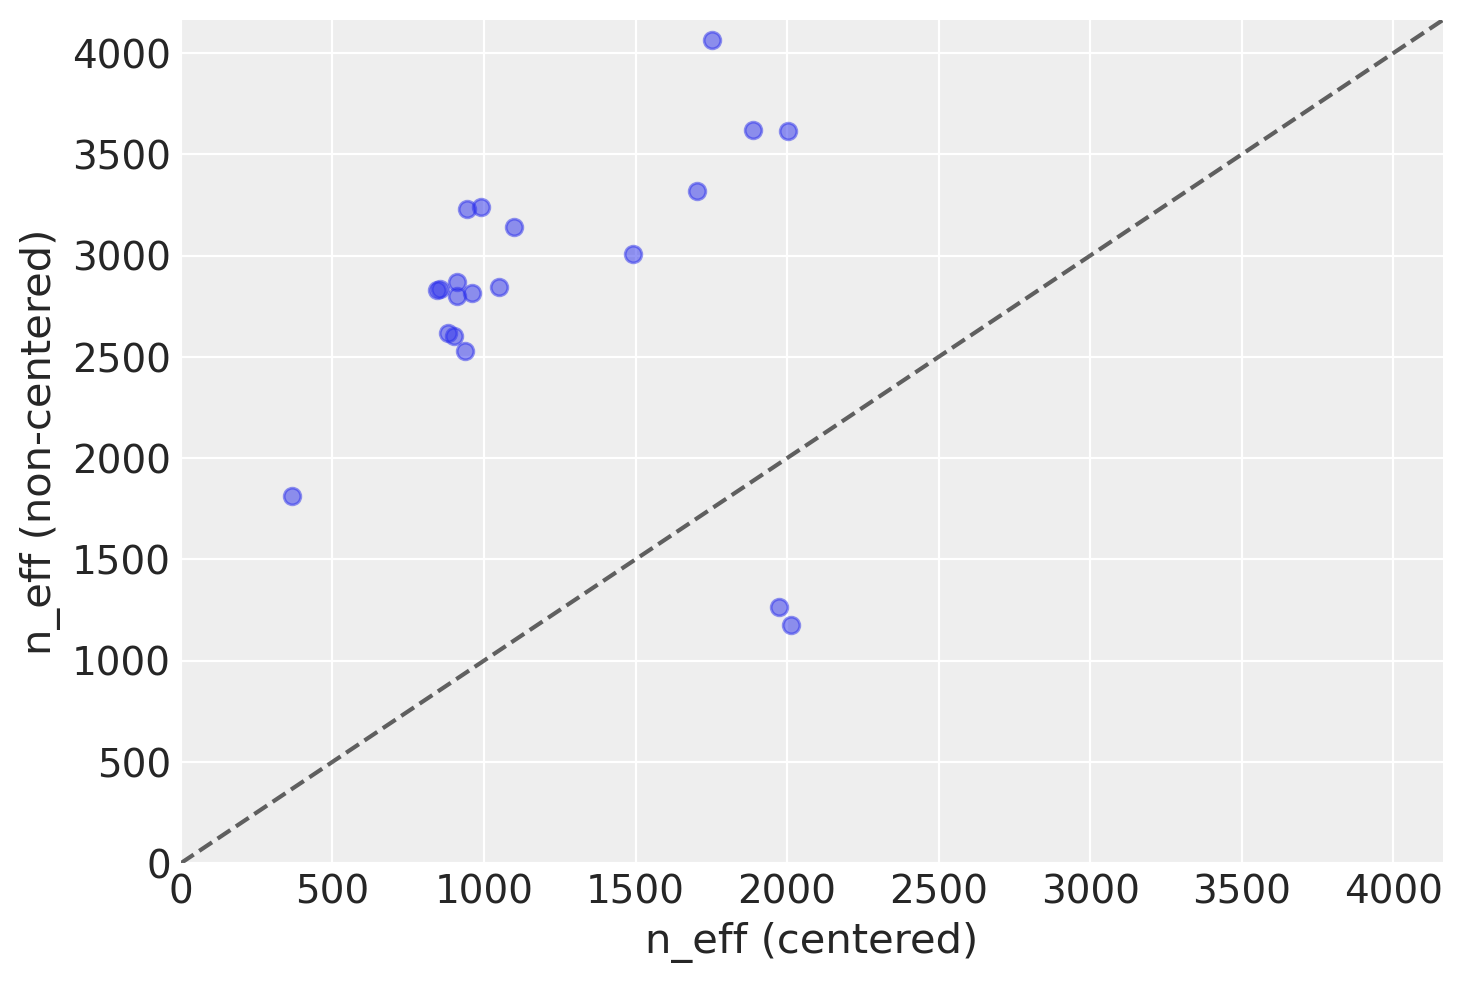

In [38]:
plt.plot(ess_bulk.m13_4.values, ess_bulk.m13_4nc.values, "o", alpha=0.5)

max_val = ess_bulk.m13_4nc.max() + 100
plt.plot(np.arange(max_val), np.arange(max_val), "k--", alpha=0.6)

plt.xlabel("n_eff (centered)")
plt.xlim(0, max_val)

plt.ylabel("n_eff (non-centered)")
plt.ylim(0, max_val);

#### Code 13.31

Before sampling posterior predictive samples, let's redefine the model with shared variables (`pm.Data`), to be able to change them when we'll do posterior predictive checks below:

In [39]:
with pm.Model() as m_13_4:
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)
    sigma_g = pm.Exponential("sigma_g", 1.0)

    a = pm.Normal("a", a_bar, sigma_a, shape=Nactor)
    g = pm.Normal("g", 0.0, sigma_g, shape=Nblock)
    b = pm.Normal("b", 0.0, 0.5, shape=Ntreatments)

    actor_ = pm.Data("actor", actor)
    block_ = pm.Data("block", block)
    treatment_ = pm.Data("treatment", treatment)
    p = pm.Deterministic("p", pm.math.invlogit(a[actor_] + g[block_] + b[treatment_]))
    pulled_left = pm.Binomial("pulled_left", 1, p, observed=d.pulled_left)

    trace_13_4 = pm.sample(tune=3000, target_accept=0.99, random_seed=RANDOM_SEED)

C:\Users\User\anaconda3\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, g, a, sigma_g, sigma_a, a_bar]


Sampling 4 chains for 3_000 tune and 1_000 draw iterations (12_000 + 4_000 draws total) took 287 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


In [40]:
chimp = 2
new_data = dict(actor=np.repeat(chimp - 1, 4), block=np.repeat(0, 4), treatment=np.arange(4))

with m_13_4:
    pm.set_data(new_data)
    post_pred_p = pm.sample_posterior_predictive(
        trace_13_4, var_names=["p"], random_seed=RANDOM_SEED
    )["p"]

#post_pred_p.mean(0).round(2), az.hpd(post_pred_p).round(2) #CA
post_pred_p.mean(0).round(2), az.hdi(post_pred_p).round(2) #CA

C:\Users\User\anaconda3\lib\site-packages\arviz\stats\stats.py:457: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


(array([0.98, 0.99, 0.97, 0.99]),
 array([[0.95, 1.  ],
        [0.97, 1.  ],
        [0.94, 1.  ],
        [0.97, 1.  ]]))

In [41]:
def chimp_pp_plot(hpd_data, mean_data, title):
    _, ax = plt.subplots(1, 1, figsize=(5, 5))
    az.plot_hdi(range(4), hpd_data)  #CA
    #az.plot_hpd(range(4), hpd_data) #CA
    ax.plot(mean_data)

    ax.set_ylim(0, 1.1)
    ax.set_xlabel("treatment")
    ax.set_ylabel("proportion pulled left")
    ax.set_xticks(range(4), ("R/N", "L/N", "R/P", "L/P"))
    plt.title(title);

<ipython-input-41-cc3639ef58c5>:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(range(4), ("R/N", "L/N", "R/P", "L/P"))


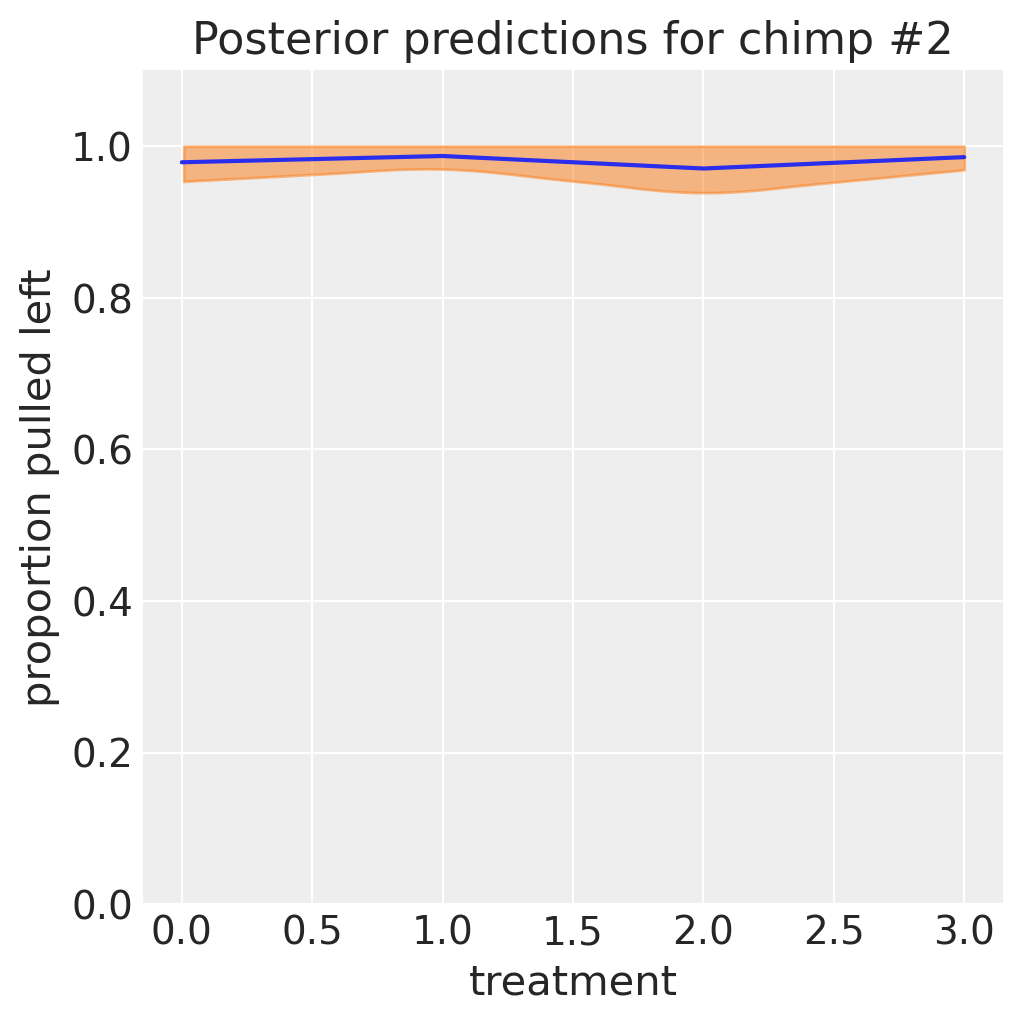

In [42]:
chimp_pp_plot(
    hpd_data=post_pred_p,
    mean_data=post_pred_p.mean(0),
    title=f"Posterior predictions for chimp #{chimp}",
)

#### Code 13.32

In [43]:
post = idata_13_4.posterior.rename_dims(
    {"a_dim_0": "actor", "g_dim_0": "block_id", "b_dim_0": "treatment"}
)
post

<xarray.Dataset>
Dimensions:  (actor: 7, block_id: 6, chain: 4, draw: 1000, treatment: 4)
Coordinates:
  * chain    (chain) int32 0 1 2 3
  * draw     (draw) int32 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
    a_dim_0  (actor) int32 0 1 2 3 4 5 6
    g_dim_0  (block_id) int32 0 1 2 3 4 5
    b_dim_0  (treatment) int32 0 1 2 3
Dimensions without coordinates: actor, block_id, treatment
Data variables:
    a_bar    (chain, draw) float64 0.9692 0.9103 0.5489 ... 1.192 0.2882 -0.4371
    a        (chain, draw, actor) float64 -0.1563 4.66 -0.4982 ... 0.2513 1.997
    g        (chain, draw, block_id) float64 0.1278 0.09044 ... 0.1451 -0.2581
    b        (chain, draw, treatment) float64 -0.3218 0.4326 ... -0.3306 0.4792
    sigma_a  (chain, draw) float64 2.057 1.782 1.396 1.967 ... 1.699 1.267 1.198
    sigma_g  (chain, draw) float64 0.1125 0.1113 0.1481 ... 0.1602 0.3488 0.2149
Attributes:
    created_at:                 2021-03-02T02:05:24.176763
    arviz_version:              0.11.2
    inference_library:          pymc3
    inference_library_version:  3.11.1
    sampling_time:              286.0552053451538
    tuning_steps:               3000

In [44]:
post["a"].shape

(4, 1000, 7)

#### Code 13.33

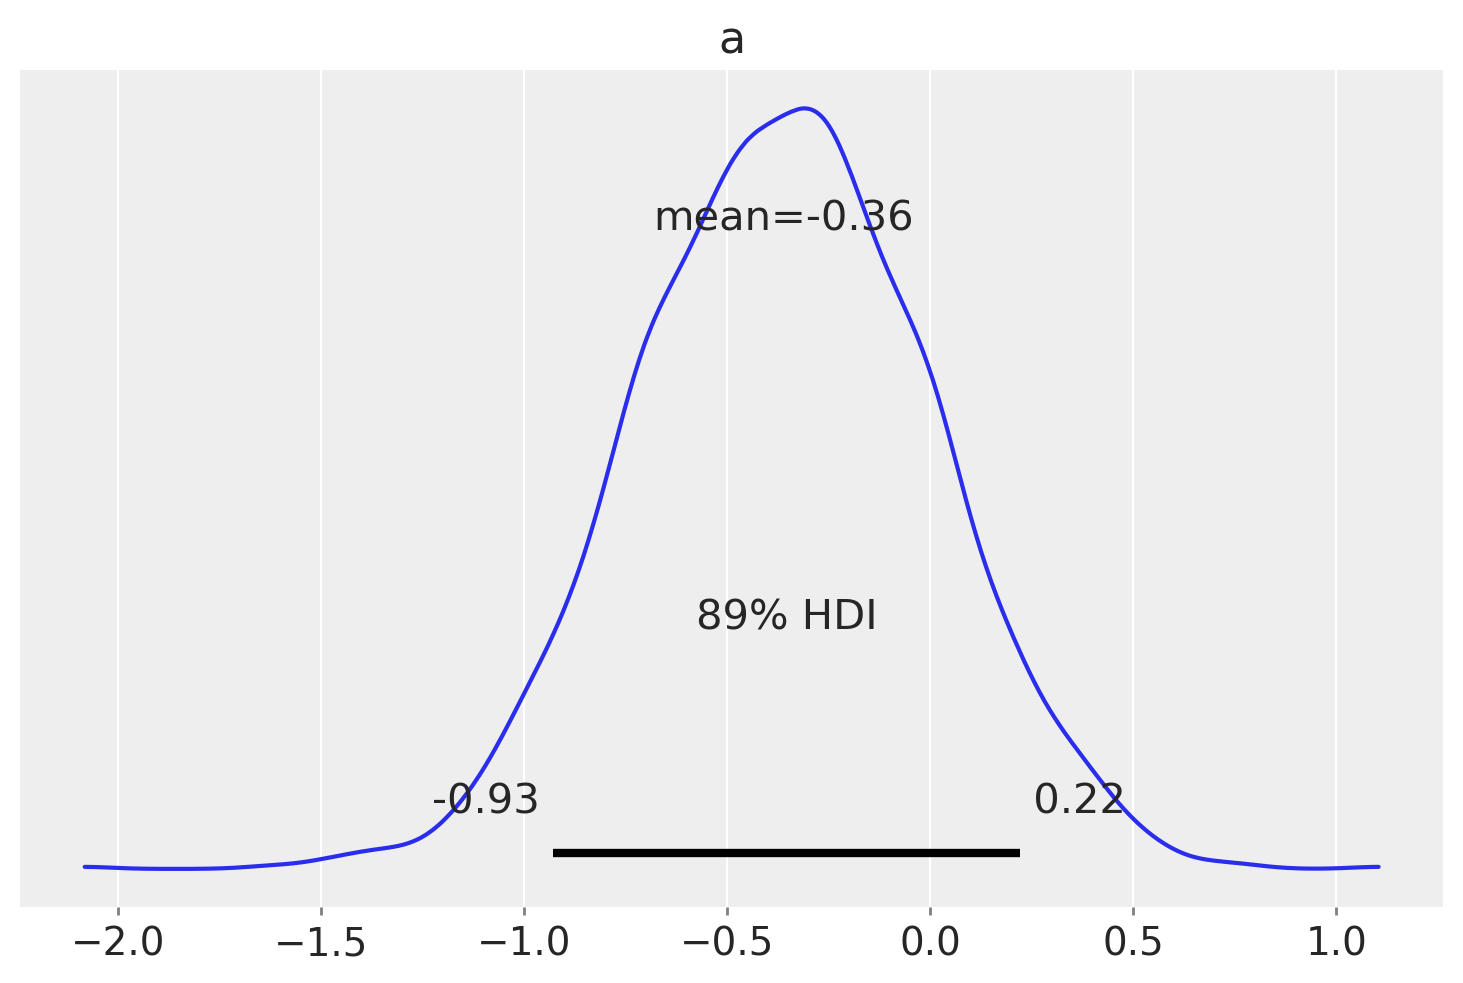

In [45]:
az.plot_posterior(post, var_names=["a"], coords={"actor": 4});

#### Code 13.34

In [46]:
def p_link(actor, block_id):
    logodds = post.sel(actor=actor)["a"] + post.sel(block_id=block_id)["g"] + post["b"]
    return logistic(logodds)

#### Code 13.35

In [47]:
p_raw = p_link(actor=1, block_id=0)
#p_raw.mean(dim=("chain", "draw")).data.round(2), az.hpd(p_raw.data).round(2) #CA
p_raw.mean(dim=("chain", "draw")).data.round(2), az.hdi(p_raw.data).round(2) #CA

(array([0.98, 0.99, 0.97, 0.99]),
 array([[0.95, 1.  ],
        [0.97, 1.  ],
        [0.94, 1.  ],
        [0.97, 1.  ]]))

<ipython-input-41-cc3639ef58c5>:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(range(4), ("R/N", "L/N", "R/P", "L/P"))


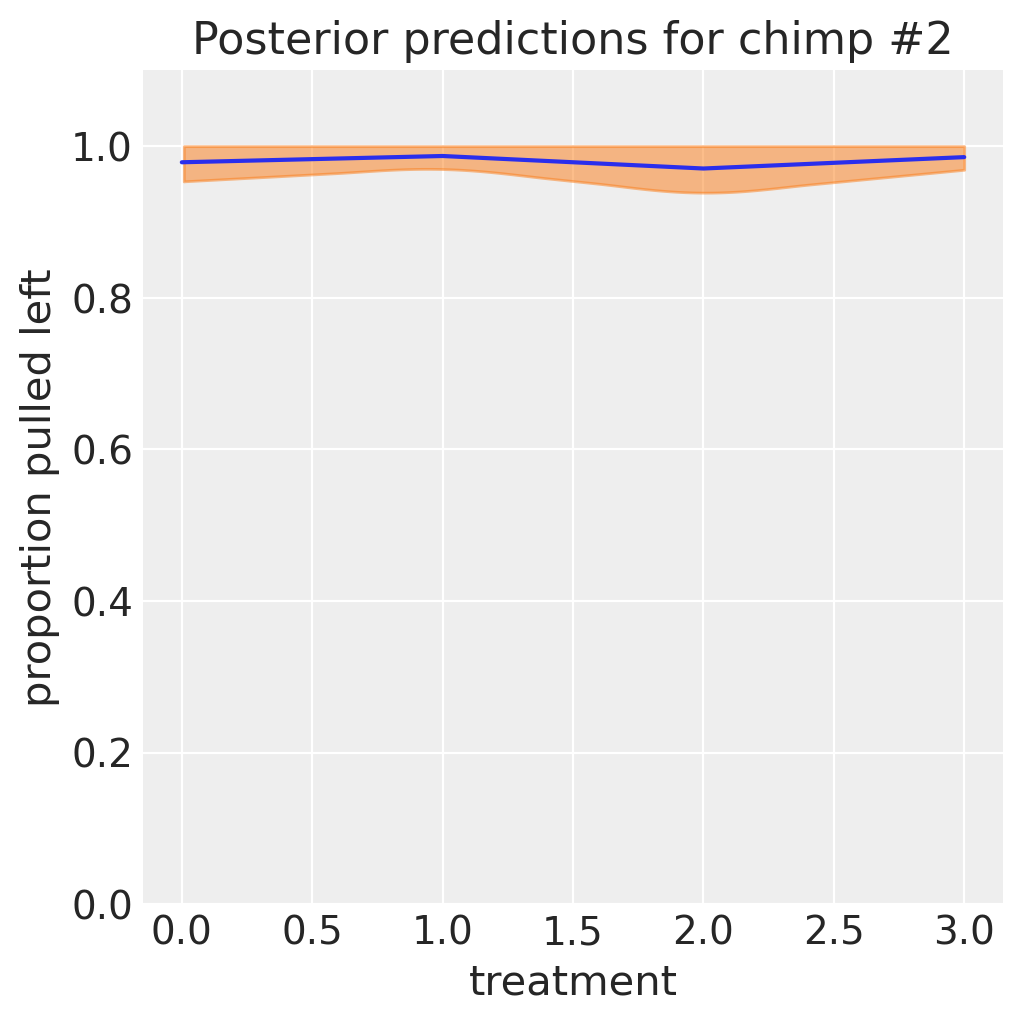

In [48]:
chimp_pp_plot(
    hpd_data=p_raw.data,
    mean_data=p_raw.mean(dim=("chain", "draw")).data,
    title=f"Posterior predictions for chimp #{chimp}",
)

#### Code 13.36

We don't need this function: we'll just add the posterior for `a_bar` and the posterior for `b`, and xarray (which is the format ArviZ uses for its `InferenceData`) will take care of the shape handling for us, even if `post["a_bar"]` and `post["b"]` have different shapes.

#### Code 13.37

<ipython-input-41-cc3639ef58c5>:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(range(4), ("R/N", "L/N", "R/P", "L/P"))


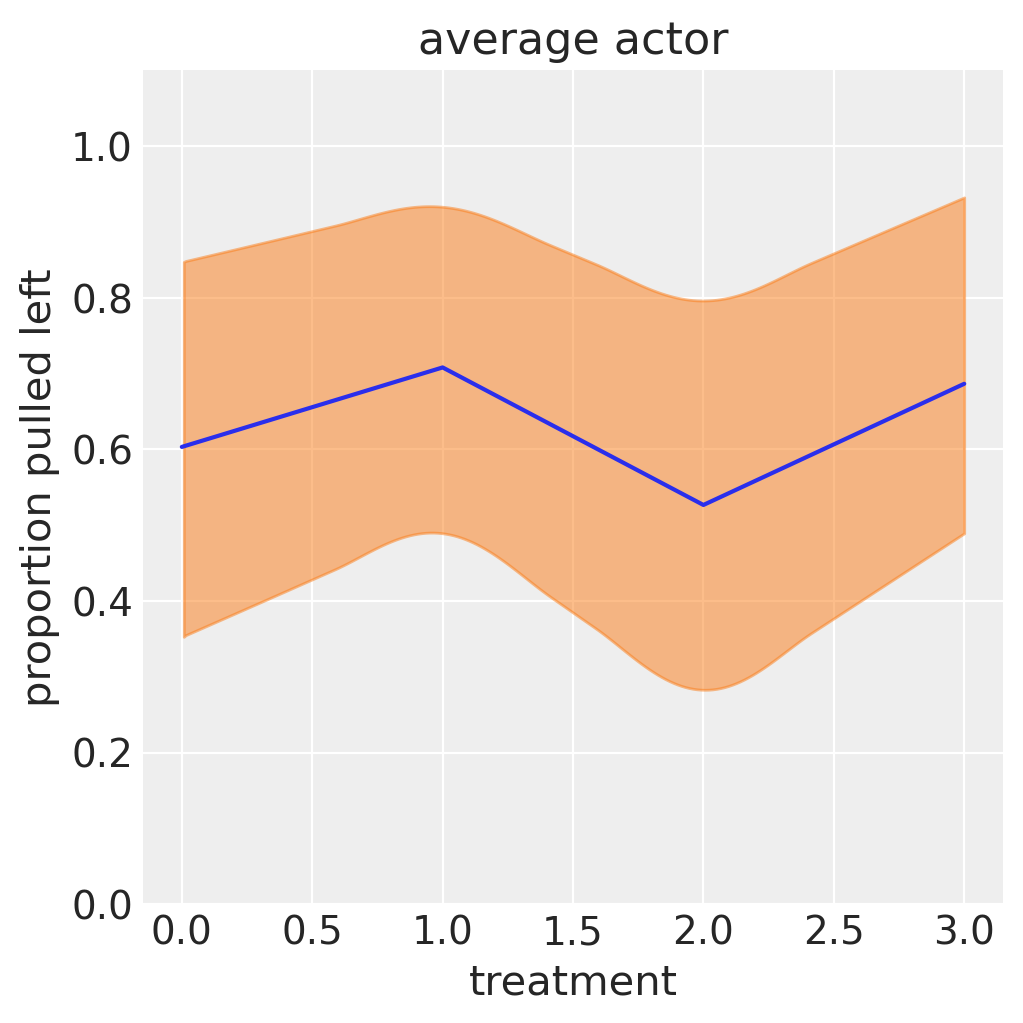

In [49]:
p_raw = logistic(post["a_bar"] + post["b"])

chimp_pp_plot(
    hpd_data=p_raw.data,
    mean_data=p_raw.mean(dim=("chain", "draw")).data,
    title="average actor",
)

#### Code 13.38

<ipython-input-41-cc3639ef58c5>:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(range(4), ("R/N", "L/N", "R/P", "L/P"))


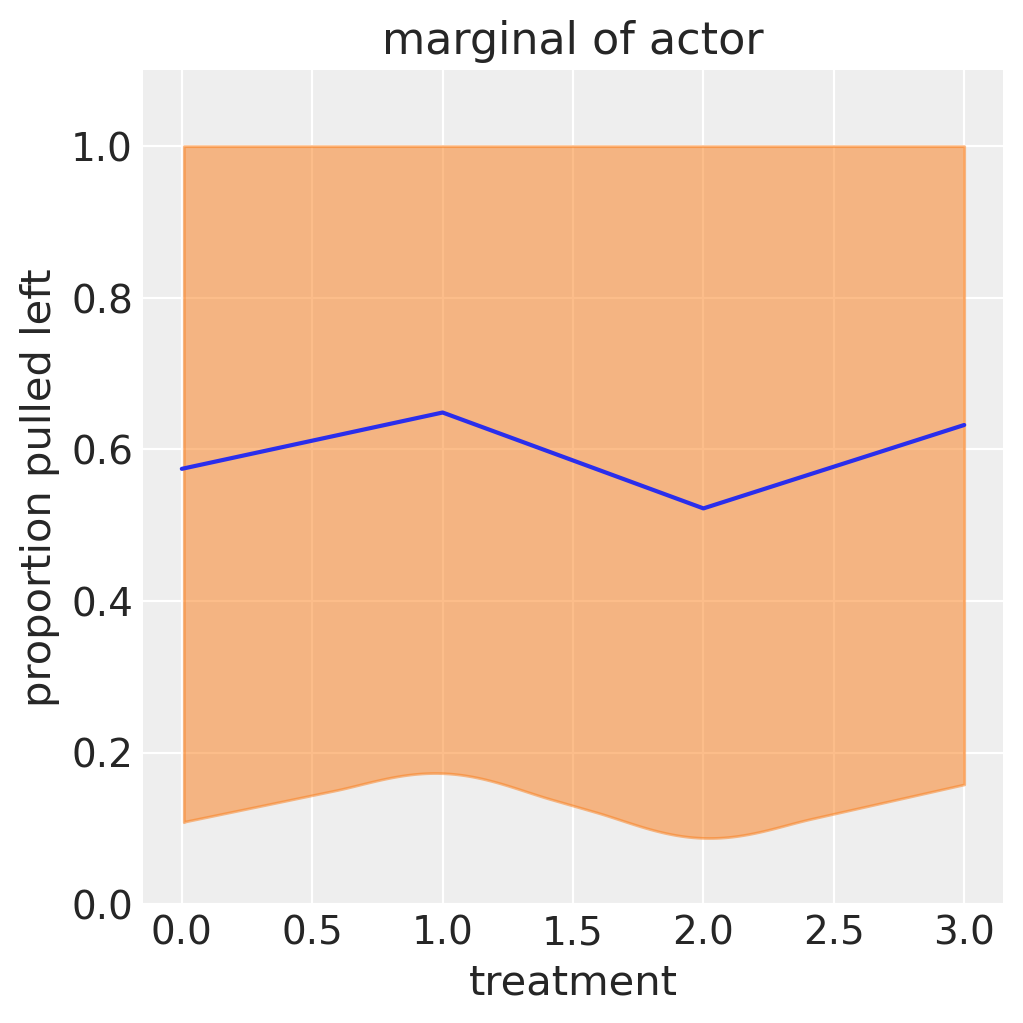

In [50]:
a_sim = np.random.normal(loc=post["a_bar"], scale=post["sigma_a"])
p_raw_asim = logistic(a_sim[:, :, None] + post["b"])

chimp_pp_plot(
    hpd_data=p_raw_asim.data,
    mean_data=p_raw_asim.mean(dim=("chain", "draw")).data,
    title="marginal of actor",
)

#### Code 13.39

<ipython-input-51-1e9097d4684c>:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(range(4), ("R/N", "L/N", "R/P", "L/P"))


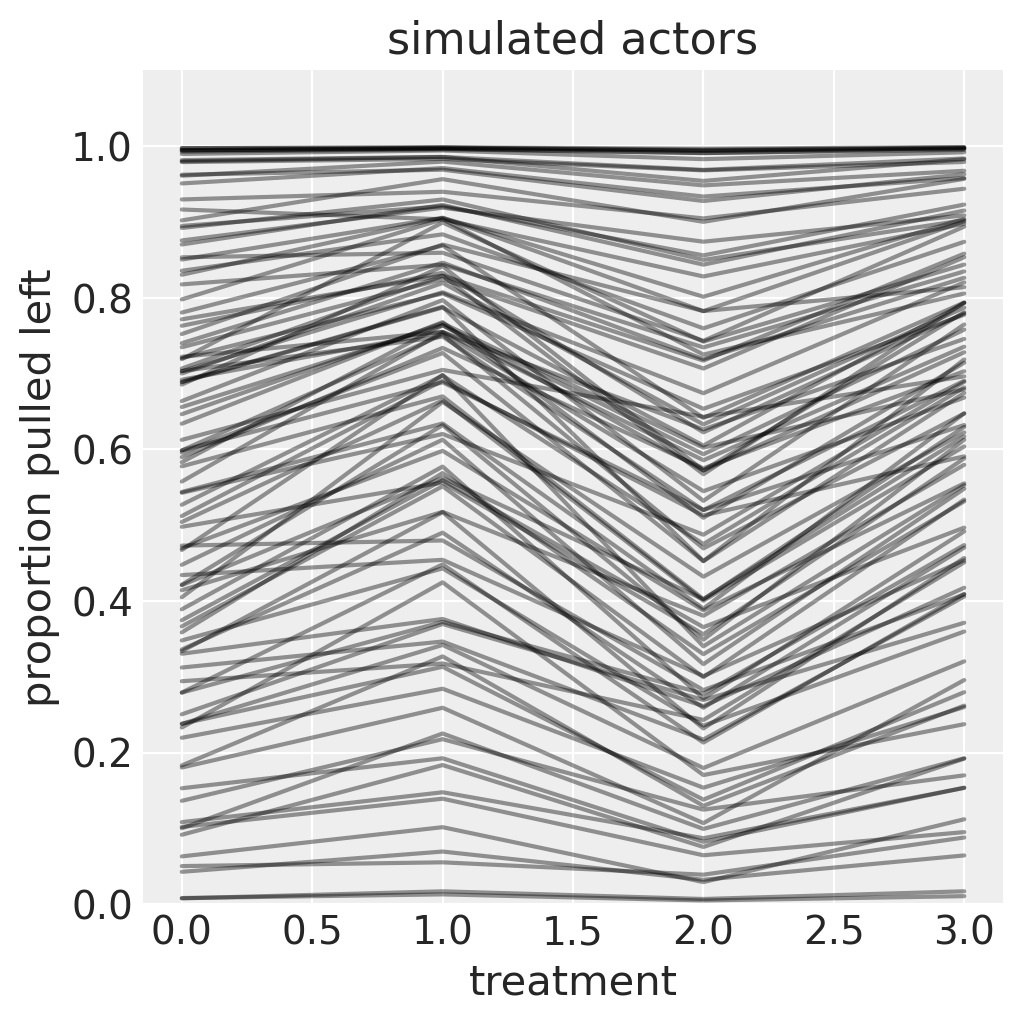

In [51]:
p_raw_asim = p_raw_asim.stack(sample=("chain", "draw"))

_, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(np.tile(np.arange(4), (100, 1)).T, p_raw_asim[:, :100].data, "k", alpha=0.4)

ax.set_ylim(0, 1.1)
ax.set_xlabel("treatment")
ax.set_ylabel("proportion pulled left")
ax.set_xticks(range(4), ("R/N", "L/N", "R/P", "L/P"))
plt.title("simulated actors");

In [52]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Mon Mar 01 2021

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

arviz     : 0.11.2
matplotlib: 3.3.2
pymc3     : 3.11.1
numpy     : 1.19.2
scipy     : 1.5.2
pandas    : 1.1.3

Watermark: 2.1.0

